# PART - A

•DOMAIN: Digital content management 

•CONTEXT: 
Classification is probably the most popular task that you would deal with in real life. Text in the form of blogs, posts, articles, etc. are written every second. It is a challenge to predict the information about the writer without knowing about him/her. We are going to create a classifier that predicts multiple features of the author of a given text. We have designed it as a Multi label classification problem. 

•DATA DESCRIPTION: 
Over 600,000 posts from more than 19 thousand bloggers The Blog Authorship Corpus consists of the collected posts of 19,320 bloggers gathered from blogger.com in August 2004. The corpus incorporates a total of 681,288 posts and over 140 million words - or approximately 35 posts and 7250 words per person. Each blog is presented as a separate file, the name of which indicates a blogger id# and the blogger’s self-provided gender, age, industry, and astrological sign. (All are labelled for gender and age but for many, industry and/or sign is marked as unknown.) All bloggers included in the corpus fall into one of three age groups: 

•8240 "10s" blogs (ages 13-17)

•8086 "20s" blogs(ages 23-27) 

•2994 "30s" blogs (ages 33-47) 


•For each age group, there is an equal number of male and female bloggers. Each blog in the corpus includes at least 200 occurrences of common English words. All formatting has been stripped with two exceptions. Individual posts within a single blogger are separated by the date of the following post and links within a post are denoted by the label url link. 

•PROJECT OBJECTIVE: To build a NLP classifier which can use input text parameters to determine the label/s of the blog. Specific to this case study, you can consider the text of the blog: ‘text’ feature as independent variable and ‘topic’ as dependent variable. 

- NOTE : Due to lack of computational resources,complexity of this problem , I did this project as batch wise as some times saving the dataframe as csv files and lists and models as pickles

    --------



# 1.Read and Analyse Dataset

### Part A - Q1 A - Clearly write outcome of data analysis(Minimum 2 points)

In [ ]:
import numpy as np
import pandas as pd
from zipfile import ZipFile
from tqdm import tqdm

In [ ]:
!pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 6.2 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import os
os.chdir("/content/drive/My Drive/NLP/")

In [ ]:
#extracting files from zipfile

file  = "blogs.zip"
with ZipFile(file,'r') as zip :
  zip.extractall()

In [ ]:
# reading csv file
blog_df = pd.read_csv("blogtext.csv")

In [ ]:
blog_df.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


In [ ]:
print("The columns present in blog are :\n",blog_df.columns)

The columns present in blog are :
 Index(['id', 'gender', 'age', 'topic', 'sign', 'date', 'text'], dtype='object')


In [ ]:
blog_df.tail()

,id,gender,age,topic,sign,date,text
681279,1713845,male,23,Student,Taurus,"01,July,2004","Dear Susan, I could write some really ..."
681280,1713845,male,23,Student,Taurus,"01,July,2004","Dear Susan, 'I have the second yeast i..."
681281,1713845,male,23,Student,Taurus,"01,July,2004","Dear Susan, Your 'boyfriend' is fuckin..."
681282,1713845,male,23,Student,Taurus,"01,July,2004","Dear Susan: Just to clarify, I am as..."
681283,1713845,male,23,Student,Taurus,"01,July,2004","Hey everybody...and Susan, You might a..."


In [ ]:
blog_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681284 entries, 0 to 681283
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      681284 non-null  int64 
 1   gender  681284 non-null  object
 2   age     681284 non-null  int64 
 3   topic   681284 non-null  object
 4   sign    681284 non-null  object
 5   date    681284 non-null  object
 6   text    681284 non-null  object
dtypes: int64(2), object(5)
memory usage: 36.4+ MB


- There are 681284 records are there , In this Id and Age are only Numerical columns and remaining aew object datatype
- It seems to be there is no Null values present in there
- By the first five and last five records Id column having total set of records and unique one ,That may be not useful for model building


In [ ]:
# lets check unique records of each column

print(blog_df['gender'].value_counts()/blog_df.shape[0])


male      0.50668
female    0.49332
Name: gender, dtype: float64


Almost The male and female blogs are 50 : 50

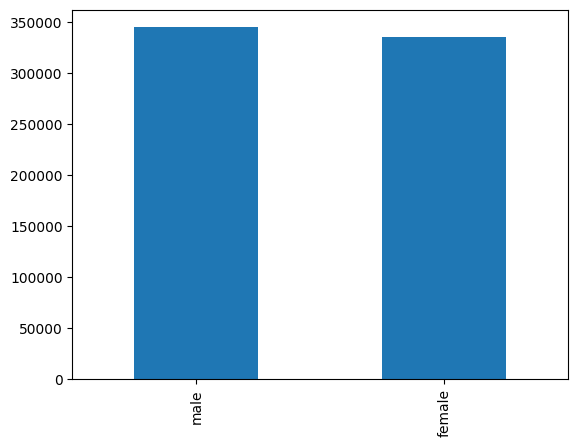

In [ ]:
blog_df['gender'].value_counts().plot(kind='bar');

In [ ]:
blog_df['age'].value_counts()

17    80859
24    80071
23    72889
16    72708
25    67051
26    55312
27    46124
15    41767
14    27400
34    21347
33    17584
35    17462
36    14229
13    13133
37     9317
38     7545
39     5556
40     5016
45     4482
43     4230
41     3738
48     3572
42     2908
46     2733
47     2207
44     2044
Name: age, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

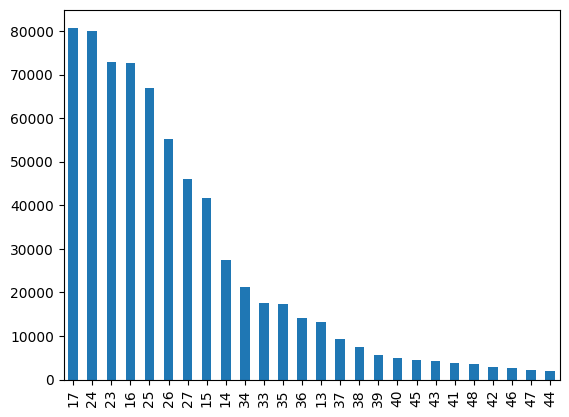

In [ ]:
blog_df['age'].value_counts().plot(kind='bar');

- Most of the blogs are posted by age of 17 

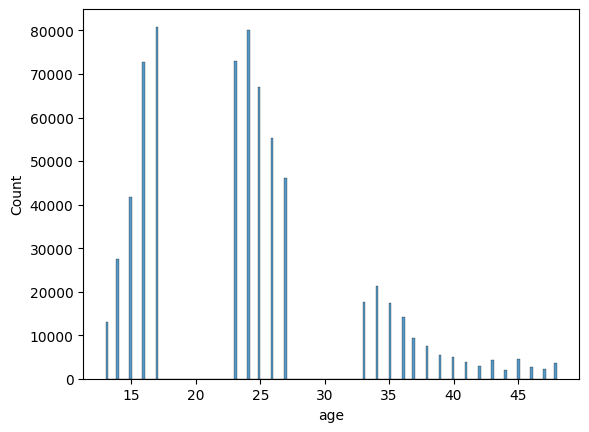

In [ ]:
sns.histplot(blog_df['age']);

- Most of the blogs are written by 15-17 and 20-27 age people

In [ ]:
blog_df['topic'].value_counts()

indUnk                     251015
Student                    153903
Technology                  42055
Arts                        32449
Education                   29633
Communications-Media        20140
Internet                    16006
Non-Profit                  14700
Engineering                 11653
Law                          9040
Publishing                   7753
Science                      7269
Government                   6907
Consulting                   5862
Religion                     5235
Fashion                      4851
Marketing                    4769
Advertising                  4676
BusinessServices             4500
Banking                      4049
Chemicals                    3928
Telecommunications           3891
Accounting                   3832
Military                     3128
Museums-Libraries            3096
Sports-Recreation            3038
HumanResources               3010
RealEstate                   2870
Transportation               2326
Manufacturing 

- Remaining categories are we known except "indUnk" ,but most of the people write blogs in this topic only,lets visualize

In [ ]:
blog_df.replace('indUnk','Unknown',inplace=True)

<Axes: >

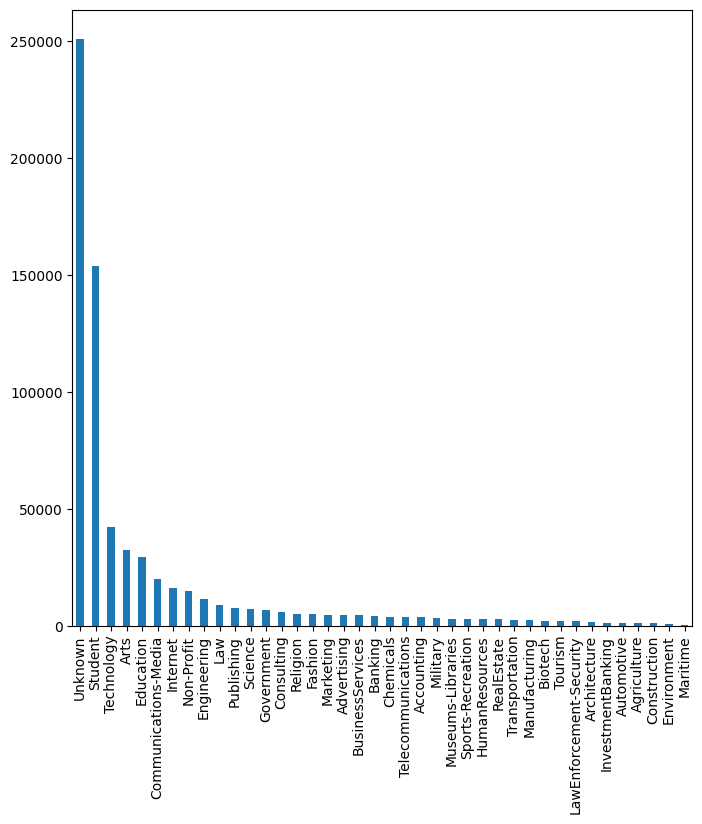

In [ ]:
plt.figure(figsize=(8,8))
blog_df.topic.value_counts().plot(kind= 'bar')

<Axes: >

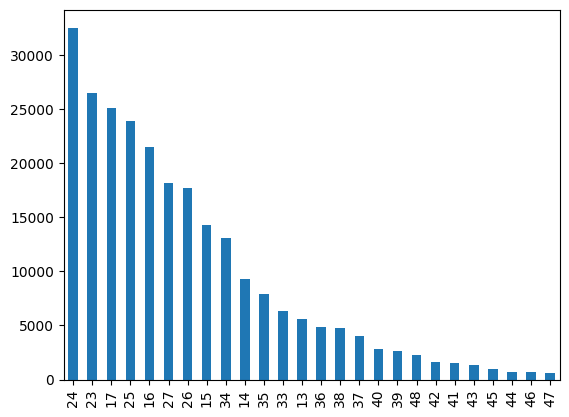

In [ ]:
# lets which age people writing on this topic

blog_df.loc[blog_df['topic']=="Unknown"]['age'].value_counts().plot(kind='bar')

the topic mostly written blogs are 20-27 age people

May be this indunk we can considered as unkown since the topics are varying to different to different people and their written blogs either their personal or others , I ll keep this as unkown



In [ ]:
blog_df['sign'].value_counts()

Cancer         65048
Aries          64979
Taurus         62561
Libra          62363
Virgo          60399
Scorpio        57161
Pisces         54053
Leo            53811
Gemini         51985
Sagittarius    50036
Aquarius       49687
Capricorn      49201
Name: sign, dtype: int64

<Axes: >

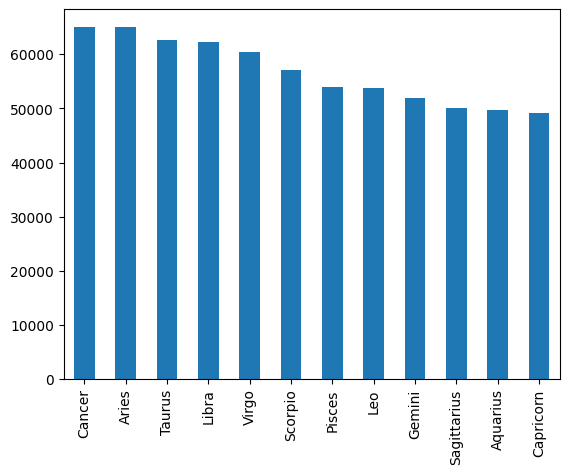

In [ ]:
blog_df['sign'].value_counts().plot(kind='bar')

In [ ]:
print("The number of unique categories in sign are : " , len(blog_df['sign'].unique()))

The number of unique categories in sign are :  12


- All Categories in sign are almost equal ratio

In [ ]:
blog_df['date'].value_counts()

02,August,2004     16544
01,August,2004     13261
03,August,2004     11851
05,August,2004      9297
04,August,2004      8661
                   ...  
10,Januar,2004         1
02,enero,2004          1
15,Mai,2004            1
08,enero,2004          1
21,October,2000        1
Name: date, Length: 2616, dtype: int64

- here we have issue with the format of date,they are in different named in months ,May be the text also be will be in the format of non english,
lets check once

In [ ]:
blog_df.loc[blog_df['date']=='10,Januar,2004']['text'][181521]

"       was at iguazu all night .. love that place. actually, there was this cute waitress there .. and everyone was like .. go .. go make your move .. go chat with her. but by the time i got enoguh booze in me to get my nerve up, the place packed up and she was busy.   damn...  sheesh whats wrong with me tonite.   anyway i had lunch with L the other day. I dunno, she didnt seem flirty or anything, just normal, friendly. and i found out that she lives with her boyfriend. and she went on a hol with him and his family. sounds like a pretty serious thing going on  but then again she did say she gets bored easily.  so thats why i didnt ask her out for the weekend like i was supposed to. M seems to think i still have a chance .. i'm not so hopeful. but she's still cool though, i wouldnt mind having her as a friend. and i bet she has cute girl friends too :) m suggested i wait about week and if she doesnt call/sms me first, sms her out for coffee or something.   good idea?            "

-its english only ,but the date  format given wrong

In [ ]:
#lets see some random text
blog_df['text'][100]

"                 i can't wait for things to get moving, i want out of here. im lookin forward to uni although it means another 3 years in england. it should be so much fun from my experiences of it so far and my brother's experiences. after uni though it will be another year i guess before i can move, as i'll need to work for 'bout that long to get some money. will be quite lonely i imagine as every1 will have moved on by then. i wana work in a pub, duno why, not any pub, not a big pub, i'd love to work the fox n hound by jill's - it's small n friendly, i think thats what attracks me to bein a barmaid - every1 thinks its somit to look down on but what's so bad bein surrounded by people in a friendly (if smoky :s) atmosphere? mayb im naive... also hav a job lined up with jill i hope :) i love the sound of what she plans to do and she says she'll employ me :) ur pretty much self-employed to be honest so it should happen n im into herbal homeopathic stuff so sounds good for me. after tha

In [ ]:
blog_df['text'][11211]

'                  urlLink    Homina homina.&nbsp; urlLink         '

In [ ]:
blog_df['text'][13231]

"       Be thou my vision, O Lord of my heart Naught be all else to me save that thou art Thou my best thought by day or by night Waking or sleeping thy presence my light.  Be thou my wisdom, thou my true word I ever with thee, thou with me, Lord Thou my great Father, I thy true Son Thou in me dwelling, and I with thee one.  Be thou my battleshield, sword for the fight Be thou my dignity, thou my delight Thou my soul's shelter, thou my high tower Raise thou me heavenward, O power of my power.  Riches I heed not, nor man's empty praise Thou mine inheritance, now and always Thou and thou only, first in my heart High King of heavem, my treasure thou art.  High King of heaven, after victory won May I reach heaven's joys, O bright heaven's sun Heart of my own heart, whatever befall Still be my vision, O ruler of all.          "

In [ ]:
blog_df['text'][15000]

'             update!!! ran out of gas, so while its cooling down for refuel i come in to get a glass of tea and take some Benadryl (the allergenic horrors out there!), and while sitting at my pc i see blood drops on my shirt, look at my wrist rest and find a blood stain pooling... somehow i cut my wrist open!! sooo, the count so far is 4 band-aids (3 to cover the length of the burn, 1 on the wrist)  before the day is through i will have used my entire Neosporin tube and an entire box of band-aids, THIS I SWEAR!         '

- By observing some random text , There is some initial space while starting their blog
- There are many special characters are in the blogs
- some of the blogs having the numerical terms also
- observed many meaning less terms and shortcut of words

## Part A - Q1 A - Clean the Structured Data:

   #### i.Missing value analysis and imputation

In [ ]:
# check for null values
blog_df.isnull().sum()

id        0
gender    0
age       0
topic     0
sign      0
date      0
text      0
dtype: int64

In [ ]:
#checking for dublicate records
blog_df.duplicated().sum()

4686

In [ ]:
# drop dublicates
blog_df1 = blog_df.drop_duplicates(keep='first',ignore_index=True)

In [ ]:
blog_df1.shape

(676598, 7)

In [ ]:
blog_df1.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


In [ ]:
blog_df1.tail()

,id,gender,age,topic,sign,date,text
676593,1713845,male,23,Student,Taurus,"01,July,2004","Dear Susan, I could write some really ..."
676594,1713845,male,23,Student,Taurus,"01,July,2004","Dear Susan, 'I have the second yeast i..."
676595,1713845,male,23,Student,Taurus,"01,July,2004","Dear Susan, Your 'boyfriend' is fuckin..."
676596,1713845,male,23,Student,Taurus,"01,July,2004","Dear Susan: Just to clarify, I am as..."
676597,1713845,male,23,Student,Taurus,"01,July,2004","Hey everybody...and Susan, You might a..."


In [ ]:
blog_df2 = blog_df1.copy()

In [ ]:
blog_df1['text'][309202]

"       İnsan var olduğu günden bu yana hep hürriyet arayışı içinde olmuştur. Bu arayış yer yer onun kendi iradesini sezişi ve onu tam gerçekleştirmeye çalışması, zaman zaman da dinle, devletle, hatta örf, adet ve ahlakla savaşması şeklinde cereyan etmiştir. 2003 senesinin Mart ayında uluslararası gençlik festivalinde (ISFiT) Norveç’in Trondheim şehrinde katılımcılar arasındaydım. Batıdan gelen gençlerle “Doğu toplulukların mevcut durumlarını ve intihar eylemleri”ni tartışıyorduk, ama anlamaya çok zorlanıyorlardı. Nasıl bir ruh hali, insanın canına göz göre göre kıyabilirdi? Batı ülkelerin vatandaşlarını ürküten, anlayamadıkları bir olaydı bu.  “Bu kadar büyük bir cani olabilmek için insanlıktan nasibini almamış olmak gerek” gibi cümleler söyledi katılımcılar.  Oysa insanlığın görmediği tür katliamlar, seri cinayetler Batı'da meydana  gelebiliyordu. İnanmayan Michael Moore’un yaptığı belgesellere, aktüalite programlarına bakabilirler.   Batı toplumları, bu resimler yayınlandıktan sonra

In [ ]:
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 14.4 MB/s eta 0:00:00


In [ ]:
import unidecode

In [ ]:
# defining an empty list
text = []

# looping over each message in the data
for i in tqdm(range(blog_df1.shape[0])):

    t = blog_df1['text'][i].split()
    # Applying the unicode data on a sentence and replacing the accented words to get the closest possible ASCII text
    new_text = [unidecode.unidecode(word) for word in t]
    
    # Combining the seperate words into sentence
    new_text = ' '.join(new_text)
    # append the new_text to list text
    text.append(new_text)

blog_df1['cleaned_text'] = text

100%|██████████| 676598/676598 [01:11<00:00, 9513.65it/s] 
<ipython-input-40-dae02cd58ee7>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  blog_df1['cleaned_text'] = text


In [ ]:
blog_df1.tail()

,id,gender,age,topic,sign,date,text,cleaned_text
676593,1713845,male,23,Student,Taurus,"01,July,2004","Dear Susan, I could write some really ...","Dear Susan, I could write some really bitter d..."
676594,1713845,male,23,Student,Taurus,"01,July,2004","Dear Susan, 'I have the second yeast i...","Dear Susan, 'I have the second yeast infection..."
676595,1713845,male,23,Student,Taurus,"01,July,2004","Dear Susan, Your 'boyfriend' is fuckin...","Dear Susan, Your 'boyfriend' is fucking BALD! ..."
676596,1713845,male,23,Student,Taurus,"01,July,2004","Dear Susan: Just to clarify, I am as...","Dear Susan: Just to clarify, I am asking you t..."
676597,1713845,male,23,Student,Taurus,"01,July,2004","Hey everybody...and Susan, You might a...","Hey everybody...and Susan, You might already k..."


In [ ]:
import contractions
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

In [ ]:
text = []
for i in tqdm(blog_df1['cleaned_text']):
  ctrs = replace_contractions(i)
  text.append(ctrs)
blog_df1['cleaned_text'] = text

100%|██████████| 676598/676598 [01:24<00:00, 8023.55it/s] 
<ipython-input-43-23f87e54a6e4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  blog_df1['cleaned_text'] = text


In [ ]:
blog_df1.tail()

,id,gender,age,topic,sign,date,text,cleaned_text
676593,1713845,male,23,Student,Taurus,"01,July,2004","Dear Susan, I could write some really ...","Dear Susan, I could write some really bitter d..."
676594,1713845,male,23,Student,Taurus,"01,July,2004","Dear Susan, 'I have the second yeast i...","Dear Susan, 'I have the second yeast infection..."
676595,1713845,male,23,Student,Taurus,"01,July,2004","Dear Susan, Your 'boyfriend' is fuckin...","Dear Susan, Your 'boyfriend' is fucking BALD! ..."
676596,1713845,male,23,Student,Taurus,"01,July,2004","Dear Susan: Just to clarify, I am as...","Dear Susan: Just to clarify, I am asking you t..."
676597,1713845,male,23,Student,Taurus,"01,July,2004","Hey everybody...and Susan, You might a...","Hey everybody...and Susan, You might already k..."


In [ ]:
import re

In [ ]:
# function for text pre-processing
def clean_text(blog_df1, punctuations=r'''!()-[]{};:'"\,<>./?@#$%^&*_~'''):
    """
    A method to clean text 
    """
    # Cleaning the urls
    string = re.sub('https?://\S+|www\.\S+', '', blog_df1)

    # Cleaning the html elements
    string = re.sub('<.*?>', '', blog_df1)

    # Removing the punctuations using regular expression
    # i.e remove anything which is not word or whitespace character
    
    string = re.sub('[^\w\s]', '', blog_df1)

    return string


In [ ]:
blog_df1['cleaned_text'] = blog_df1['cleaned_text'].apply(clean_text)

<ipython-input-47-1a0a69b21f07>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  blog_df1['cleaned_text'] = blog_df1['cleaned_text'].apply(clean_text)


In [ ]:
blog_df1

,id,gender,age,topic,sign,date,text,cleaned_text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,...",Info has been found 100 pages and 45 MB of pd...
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...,These are the team members Drewes van der Laag...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...,In het kader van kernfusie op aarde MAAK JE EI...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!,testing testing
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...,Thanks to Yahoos Toolbar I can now capture the...
...,...,...,...,...,...,...,...,...
676593,1713845,male,23,Student,Taurus,"01,July,2004","Dear Susan, I could write some really ...",Dear Susan I could write some really bitter di...
676594,1713845,male,23,Student,Taurus,"01,July,2004","Dear Susan, 'I have the second yeast i...",Dear Susan I have the second yeast infection i...
676595,1713845,male,23,Student,Taurus,"01,July,2004","Dear Susan, Your 'boyfriend' is fuckin...",Dear Susan Your boyfriend is fucking BALD Good...
676596,1713845,male,23,Student,Taurus,"01,July,2004","Dear Susan: Just to clarify, I am as...",Dear Susan Just to clarify I am asking you to ...


In [ ]:
blog_df1['text'][500]

"       On Monday I started the possibility of the process of buying my own place.  I just met with a realtor, that's all, no paper-signing going on, no commitments, yet.  It's a scary thing this idea of home ownership, signing away your life for 30 years.  It's a good idea, financially, but mentally, is this good for me?    I have a few single girlfriends who have bought places.  Two friends in Richmond bought houses.  I think they have balls.  Not that home ownership is that big of a deal, but a house is a big deal.  I personally can't go that big.  The mowing, the pruning, roof replacement, window washing, it's too much.  I can barely handle keeping my 6-room apartment in orderly shape.  I can just imagine the letters from neighbors that I would get concerning the jungle that would certainly grow outside my home.  So a condo, a condo sounds good to me.  It's like an apartment, but I'd get to paint the walls and a tax deduction.    Condo searching is hard.  While I'm still in the beg

In [ ]:
blog_df1['cleaned_text'][500]

'On Monday I started the possibility of the process of buying my own place I just met with a realtor that is all no papersigning going on no commitments yet It is a scary thing this idea of home ownership signing away your life for 30 years It is a good idea financially but mentally is this good for me I have a few single girlfriends who have bought places Two friends in Richmond bought houses I think they have balls Not that home ownership is that big of a deal but a house is a big deal I personally cannot go that big The mowing the pruning roof replacement window washing it is too much I can barely handle keeping my 6room apartment in orderly shape I can just imagine the letters from neighbors that I would get concerning the jungle that would certainly grow outside my home So a condo a condo sounds good to me It is like an apartment but I would get to paint the walls and a tax deduction Condo searching is hard While I am still in the beginning stages I have already seen 3 in person a

In [ ]:
null_index = blog_df1.loc[blog_df1['cleaned_text'] =='nan'].index
for i in tqdm(null_index):
  blog_df1.drop(i,axis=0,inplace = True)

0it [00:00, ?it/s]


In [ ]:
blog_df1.reset_index(drop=True,inplace = True)

#### ii) Eliminate Non-English textual data.





---



In [ ]:
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 16.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993224 sha256=1a61bd3c2ad41dc099eb8b99e83617b3dc3a3c79321799cfef7f5943ecfc0b48
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


-  I am dividing the age of people by 10's,20's,30's

---



In [ ]:
blog_df1.replace(np.arange(13,18),'10s',inplace = True)
blog_df1.replace(np.arange(23,28),'20s',inplace = True)
blog_df1.replace(np.arange(33,49),'30s',inplace = True)

<ipython-input-54-9cf4bea31938>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  blog_df1.replace(np.arange(13,18),'10s',inplace = True)
<ipython-input-54-9cf4bea31938>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  blog_df1.replace(np.arange(23,28),'20s',inplace = True)
<ipython-input-54-9cf4bea31938>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  blog_df1.replace(np.arange(33,49),'30s',inplace = True)


In [ ]:
df1 = blog_df1.copy()

In [ ]:
len(df1)

676598

In [ ]:
from langdetect import detect

In [ ]:
indexes = []
non_eng = []
error_index = []
for i in tqdm(df1['cleaned_text'].index):
  try:
    if detect(df1['cleaned_text'][i]) == 'en':
      m = detect(i)
    else:
      n = detect(df1['cleaned_text'][i])
      non_eng.append(n)
      indexes.append(i)
  except Exception as e:
    error_index.append(i)

100%|██████████| 676598/676598 [1:21:24<00:00, 138.52it/s]


In [ ]:
df1['cleaned_text']

0         Info has been found  100 pages and 45 MB of pd...
1         These are the team members Drewes van der Laag...
2         In het kader van kernfusie op aarde MAAK JE EI...
3                                           testing testing
4         Thanks to Yahoos Toolbar I can now capture the...
                                ...                        
676593    Dear Susan I could write some really bitter di...
676594    Dear Susan I have the second yeast infection i...
676595    Dear Susan Your boyfriend is fucking BALD Good...
676596    Dear Susan Just to clarify I am asking you to ...
676597    Hey everybodyand Susan You might already know ...
Name: cleaned_text, Length: 676598, dtype: object

In [ ]:
# these indexes more important once it was lost i need to run entire lang detect approximately 2 hours
import pickle
pickle.dump(indexes,open('indexes.pkl','wb'))

In [ ]:
for i in indexes,non_eng:
  print("the index number {}".format(i))

the index number [1, 150, 237, 318, 325, 437, 751, 753, 754, 755, 756, 757, 759, 760, 761, 762, 764, 766, 782, 786, 787, 788, 800, 802, 804, 805, 806, 1163, 1164, 1248, 1258, 1259, 1260, 1262, 1264, 1267, 1268, 1272, 1273, 1274, 1279, 1283, 1287, 1304, 1349, 1351, 1352, 1391, 1421, 1441, 1508, 1538, 1543, 1547, 1548, 1570, 1595, 1619, 1621, 1624, 1628, 1645, 1665, 1668, 1677, 1680, 1682, 1695, 1698, 1711, 1719, 1737, 1740, 1760, 1785, 1793, 1833, 1872, 1873, 1887, 1893, 1918, 1935, 1978, 1995, 2010, 2025, 2030, 2037, 2062, 2076, 2079, 2086, 2105, 2117, 2119, 2142, 2145, 2151, 2160, 2162, 2172, 2176, 2184, 2208, 2224, 2226, 2230, 2237, 2249, 2270, 2293, 2332, 2339, 2346, 2377, 2380, 2392, 2409, 2425, 2438, 2462, 2481, 2499, 2502, 2512, 2526, 2527, 2543, 2554, 2555, 2556, 2565, 2575, 2577, 2584, 2588, 2590, 2602, 2640, 2679, 2680, 2684, 2686, 2700, 2718, 2733, 2743, 2748, 2749, 2750, 2752, 2765, 2776, 2781, 2790, 2793, 2804, 2830, 2850, 2856, 2886, 2891, 2902, 2906, 2908, 2916, 2922, 293

In [ ]:
# dropping these non-eng datapoints
for i in tqdm(indexes):
  df1.drop(i,axis=0,inplace = True)

100%|██████████| 25199/25199 [59:49<00:00,  7.02it/s]


In [ ]:
df1.reset_index(drop= True,inplace = True)

In [ ]:
df1.tail()

,id,gender,age,topic,sign,date,text,cleaned_text
651394,1713845,male,20s,Student,Taurus,"01,July,2004","Dear Susan, I could write some really ...",Dear Susan I could write some really bitter di...
651395,1713845,male,20s,Student,Taurus,"01,July,2004","Dear Susan, 'I have the second yeast i...",Dear Susan I have the second yeast infection i...
651396,1713845,male,20s,Student,Taurus,"01,July,2004","Dear Susan, Your 'boyfriend' is fuckin...",Dear Susan Your boyfriend is fucking BALD Good...
651397,1713845,male,20s,Student,Taurus,"01,July,2004","Dear Susan: Just to clarify, I am as...",Dear Susan Just to clarify I am asking you to ...
651398,1713845,male,20s,Student,Taurus,"01,July,2004","Hey everybody...and Susan, You might a...",Hey everybodyand Susan You might already know ...


In [ ]:
#saving the dataframe for future use and computational complexity
df1.to_csv("en-df.csv")

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/My Drive/NLP/')
df1 = pd.read_csv('en-df.csv')

Mounted at /content/drive


In [ ]:
df1.drop(['id','gender','date'],axis=1,inplace = True)

## 2. Preprocess unstructured data to make it consumable for model training.

## Part A - Q2 A - Eliminate All special Characters and Numbers

In [ ]:
from tqdm import tqdm
import re

In [ ]:
df1.isna().sum()

Unnamed: 0         0
age                0
topic              0
sign               0
text               0
cleaned_text    2578
dtype: int64

In [ ]:
df1.dropna(inplace=True)

In [ ]:
df1.reset_index(drop= True,inplace = True)

In [ ]:
df1['cleaned_text'] = df1['cleaned_text'].astype('str')

In [ ]:
# defining an empty list
text = []

# Specifying the pattern for regex to match a string of characters that are not a letters or numbers 
# regex will look for alphabets A to Z, a to z
pattern = '[^A-Za-z]'

# looping over each message in the data
for i in tqdm(range(df1.shape[0])):

    words = df1['cleaned_text'][i].split() # splitting text into separate words
    new_text = ''.join(re.sub(pattern, ' ', df1['cleaned_text'][i])) # finding the pattern and using the join() function to retrive the original text
    text.append(new_text) # append the new_text to empty list text
    
df1['cleaned_text'] = text

100%|██████████| 648821/648821 [01:19<00:00, 8136.26it/s]


## Part A - Q2 B - Lowercase all textual data

In [ ]:
# defining an empty list
text = []

# looping over each message in the data
for i in tqdm(range(df1.shape[0])):
    # lowecasing the text using the lower() function
    new_text = df1['cleaned_text'][i].lower()
    text.append(new_text) # append the new_text to empty list text

df1['cleaned_text'] = text

100%|██████████| 648821/648821 [00:04<00:00, 156159.58it/s]


## Part A - Q2 C - Remove all Stopwords

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# defining an empty list
text = []

for i in tqdm(range(df1.shape[0])):
    
    word = df1['cleaned_text'][i].split() # splitting text into separate words 
    # removing the english language stopwords from the messages
    new_text = [w for w in word if not w in stopwords.words('english')] 
    new_text = ' '.join(new_text) #retriving the original text
    text.append(new_text) # 
    
df1['cleaned_text'] = text

100%|██████████| 648821/648821 [3:30:53<00:00, 51.27it/s] 


In [ ]:
# saving these dataframe 
df1.to_csv('stop_w_df.csv')

In [ ]:
df1 = pd.read_csv('stop_w_df.csv')

## Part A - Q2 D - Remove all extra white spaces

In [ ]:
df1['cleaned_text'] = df1['cleaned_text'].astype('str')

In [ ]:
# defining an empty list
text = []

# looping over each message in the data
for i in tqdm(range(df1.shape[0])):
    # removing extra spaces from the text using strip() function
    new_text = df1['cleaned_text'][i].strip() 
    text.append(new_text)  # append the new_text to empty list text
    
df1['cleaned_text'] = text

100%|██████████| 648821/648821 [00:04<00:00, 151047.62it/s]


In [ ]:
df1['text'][800]

"             Why did I remember that I had a Blogger account from  2 or 3 years ago all of a sudden? Not really sure...but might as well use it since I'm bored right now.  For anyone that's reading this and doesn't know who I am, I'm not entirely sure why you're here, but feel free to keep reading. My name is Jeff Guebert (my last name is where the title of my blog comes from, courtesy of one of my friends about 10 years ago), I'm 17, and I live in Dallas. There, you know me now.  I'll probably get around to writing a more interesting (and longer) post tomorrow. For now, though, it's time to go to sleep...         "

In [ ]:
df1['cleaned_text'][800]

'remember blogger account years ago sudden really surebut might well use since bored right anyone reading know entirely sure feel free keep reading name jeff guebert last name title blog comes courtesy one friends years ago live dallas know probably get around writing interesting longer post tomorrow though time go sleep'

In [ ]:
df1['text'][10001]

"       I have ceased to care and I'm adopting an casually-indifferent attitude to this shit. For some reason, I figured that it's worse than being annoyed or pissed off. At least if I was frustrated, it'd show I still cared about it. Sure it's a step down from being happy but hey, better some care than don't care right?  I guess I still DO care. Even that tiny teensy little wee bit. Or enough for me to bother asking 'Why the fuck do I bother anymore'  And to those of you who are going to ask me 'What happened?', nothing did. Nothing in particular happened. I just can't be fucked anymore.         "

In [ ]:
df1['cleaned_text'][10001]

'ceased care adopting casuallyindifferent attitude shit reason figured worse annoyed pissed least frustrated would show still cared sure step happy hey better care care right guess still care even tiny teensy little wee bit enough bother asking fuck bother anymore going ask happened nothing nothing particular happened cannot fucked anymore'

In [ ]:
# Importing the NLTK library
import nltk

nltk.download('stopwords')    # Loading the stopwords
nltk.download('punkt')        # Loading the punkt module, used in Tokenization
nltk.download('omw-1.4')      # Dependency for Tokenization
nltk.download('wordnet')      # Loading the wordnet module, used in stemming and lemmatization

from nltk.corpus import stopwords

# Helps to visualize the wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Used in Stemming
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer

# Used in Lemmatization
from nltk.stem import WordNetLemmatizer

# Used in Tokenization
from nltk.tokenize import word_tokenize, sent_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# Initializing the Porter Stemmer
ps = PorterStemmer()

# defining empty list for porter stemmer output
porter_stems = []

# looping over each message in the data
for i in tqdm(range(df1.shape[0])):
  text = df1['cleaned_text'][i].split() # splitting text into separate words 
  new_text = [ps.stem(word) for word in text] # applying the porter stemmer on every word of a mesaage
  new_text = ' '.join(new_text)#retriving the original text
  porter_stems.append(new_text) # append the text with base form of words in a message to empty list text
    
df1['port_cleaned_text'] = porter_stems

100%|██████████| 648821/648821 [22:50<00:00, 473.47it/s]


In [ ]:
df1.loc[:6,['cleaned_text','port_cleaned_text']]

,cleaned_text,port_cleaned_text
0,info found pages mb pdf files wait untill team...,info found page mb pdf file wait until team le...
1,het kader van kernfusie op aarde maak je eigen...,het kader van kernfusi op aard maak je eigen w...
2,testing testing,test test
3,thanks yahoos toolbar capture urls popupswhich...,thank yahoo toolbar captur url popupswhich mea...
4,interesting conversation dad morning talking k...,interest convers dad morn talk korean put mone...
5,somehow cocacola way summing things well early...,somehow cocacola way sum thing well earli flag...
6,anything korea country extremes everything see...,anyth korea countri extrem everyth seem fadbas...


In [ ]:
# Initializing the snowball Stemmer
snowball = SnowballStemmer(language='english')

# defining empty list for porter stemmer output
snow_stems = []

# looping over each message in the data
for i in tqdm(range(df1.shape[0])):
  text = df1['cleaned_text'][i].split() # splitting text into separate words 
  new_text = [snowball.stem(word) for word in text] # applying the porter stemmer on every word of a mesaage
  new_text = ' '.join(new_text)#retriving the original text
  snow_stems.append(new_text) # append the text with base form of words in a message to empty list text
    
df1['snow_cleaned_text'] = snow_stems

100%|██████████| 648821/648821 [14:09<00:00, 764.04it/s]


In [ ]:
df1.loc[:6,['cleaned_text','snow_cleaned_text']]

,cleaned_text,snow_cleaned_text
0,info found pages mb pdf files wait untill team...,info found page mb pdf file wait until team le...
1,het kader van kernfusie op aarde maak je eigen...,het kader van kernfusi op aard maak je eigen w...
2,testing testing,test test
3,thanks yahoos toolbar capture urls popupswhich...,thank yahoo toolbar captur url popupswhich mea...
4,interesting conversation dad morning talking k...,interest convers dad morn talk korean put mone...
5,somehow cocacola way summing things well early...,somehow cocacola way sum thing well earli flag...
6,anything korea country extremes everything see...,anyth korea countri extrem everyth seem fadbas...


In [ ]:
# initiating Lemmatizer available in NLTK library
lemmatizer = WordNetLemmatizer()

# defining empty list for lemmatizer output
lemma = []

# looping over each message in the data
for i in tqdm(range(df1.shape[0])):
  text = df1['cleaned_text'][i].split()  # splitting text into separate words 
  new_text = [lemmatizer.lemmatize(word) for word in text] # perfoming lemmatization on every word of a mesaage
  new_text = ' '.join(new_text) #retriving the original text
  lemma.append(new_text) # append the text with base form of words in a message to empty list text

df1['lem_cleaned_text'] = lemma

100%|██████████| 648821/648821 [04:06<00:00, 2635.14it/s]


In [ ]:
df1.loc[:6,['cleaned_text','lem_cleaned_text']]

,cleaned_text,lem_cleaned_text
0,info found pages mb pdf files wait untill team...,info found page mb pdf file wait untill team l...
1,het kader van kernfusie op aarde maak je eigen...,het kader van kernfusie op aarde maak je eigen...
2,testing testing,testing testing
3,thanks yahoos toolbar capture urls popupswhich...,thanks yahoo toolbar capture url popupswhich m...
4,interesting conversation dad morning talking k...,interesting conversation dad morning talking k...
5,somehow cocacola way summing things well early...,somehow cocacola way summing thing well early ...
6,anything korea country extremes everything see...,anything korea country extreme everything seem...


- In all these stemming and lemmatization techniques, lemmatization gives more accurate rootwords than compared with others

In [ ]:
words_list =[]

for word in tqdm(df1['lem_cleaned_text']):
    
    #tokenize data
    string = word_tokenize(word)
    
    words_list.append(string)

df1['word_cleaned_text'] = words_list

100%|██████████| 648821/648821 [04:27<00:00, 2428.59it/s]


In [ ]:
#saving the dataframe
df1.to_csv('final_blog_csvfile.csv')

# 3. Build a base Classification model
## Part A - Q3 A - Create dependent and independent variables

In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive/')
import os
os.chdir('/content/drive/ My Drive/NLP/')
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

Mounted at /content/drive/


In [ ]:
final_df = pd.read_csv('final_blog_csvfile.csv')

In [ ]:
final_df.dropna(inplace=True)
final_df.reset_index(drop=True,inplace=True)

In [ ]:
final_df['topic'].value_counts()

Unknown                    239125
Student                    146370
Technology                  40043
Arts                        31001
Education                   28443
Communications-Media        19239
Internet                    15146
Non-Profit                  14067
Engineering                 10997
Law                          8724
Publishing                   7460
Science                      6866
Government                   6561
Consulting                   5574
Religion                     5057
Fashion                      4561
Marketing                    4542
Advertising                  4461
BusinessServices             4236
Banking                      3804
Chemicals                    3675
Telecommunications           3595
Accounting                   3574
Museums-Libraries            3031
Military                     3009
Sports-Recreation            2910
HumanResources               2856
RealEstate                   2801
Manufacturing                2160
Biotech       

In [ ]:
df_A = final_df.sample(20000)

In [ ]:
df_A = pd.read_csv("sample_df.csv")

In [ ]:
X = df_A['word_cleaned_text']
Y = df_A['topic']

In [ ]:
Y.value_counts(normalize=True)

Unknown                    0.37145
Student                    0.22525
Technology                 0.06055
Arts                       0.04825
Education                  0.04245
Communications-Media       0.03040
Internet                   0.02330
Non-Profit                 0.02130
Engineering                0.01625
Law                        0.01480
Science                    0.01050
Government                 0.01045
Publishing                 0.01000
Consulting                 0.01000
Religion                   0.00790
Marketing                  0.00675
BusinessServices           0.00655
Banking                    0.00640
Advertising                0.00625
Telecommunications         0.00605
Fashion                    0.00590
Chemicals                  0.00580
Accounting                 0.00525
Museums-Libraries          0.00510
HumanResources             0.00495
Military                   0.00480
RealEstate                 0.00465
Sports-Recreation          0.00440
Biotech             

- Its highly imbalance dataset
- Accuracy is not a good measure ,hence we need to consider 
  - Precision score
  - recall score
  - f1 score
  - hamming loss



## Part A - Q3 B - Split data into train and test.

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42,stratify=Y)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(16000,)
(16000,)
(4000,)
(4000,)


## Part A - Q3 C - Vectorize data using any one vectorizer.

## Bag of Vectors

In [ ]:
# Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
bow_vec = CountVectorizer(max_features=2500,ngram_range=(1,1))     # Keep only 2500 features as number of features will increase the processing time.
bow_vec.fit(x_train)
x_train_bow = bow_vec.transform(x_train)
x_test_bow = bow_vec.transform(x_test)
x_train_bow = x_train_bow.toarray()                      # Convert the data features to array.
x_test_bow = x_test_bow.toarray()

## Part A - Q3 D - Build a base model for Supervised Learning - Classification.

In [ ]:
# Using Random Forest to build model for the classification of reviews.
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_jobs=-1)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score,classification_report,confusion_matrix,f1_score
from sklearn.metrics import hamming_loss

In [ ]:
def mod_metrics(model,x_train,y_train,x_test,y_test):   
    y_pred_tr = model.predict(x_train)
    y_pred = model.predict(x_test)
    print("--"*30)
    print("The Training accuracy score  is {} ".format(accuracy_score(y_train,y_pred_tr),))
    print("The Testing accuracy score is {} ".format(accuracy_score(y_test,y_pred)))
    print("The precision score is {}".format(precision_score(y_test,y_pred,average='weighted'))) 
    print("The recall score is {}  ".format(recall_score(y_test,y_pred,average = 'weighted')))
    print('The Hamming loss is ', hamming_loss(y_test,y_pred))
    print("The classification report is \n :" , classification_report(y_test,y_pred))

In [ ]:
import time
def models_metrics(model,x_tr,y_tr,x_ts,y_ts):
  print("*-*"*50)
  print(model)
  #start the timer
  start_time = time.time()
  #train the model
  model.fit(x_tr,y_tr)
  #caluculating the traning time
  training_time = time.time()-start_time

  print("training time :",training_time,"seconds")
  print("*-*"*50)
  mod_metrics(model,x_tr,y_tr,x_ts,y_ts)

In [ ]:
# function for caluculating ROC-AUC Score
def roc_aucscore(model,x_ts,y_ts):
  y_pred = model.predict_proba(x_ts)
  print("The ROC-AUC score is {}".format(roc_auc_score(y_ts,y_pred,multi_class='ovr')))

In [ ]:
models_metrics(rf,x_train_bow,y_train,x_test_bow,y_test)

*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
RandomForestClassifier(n_jobs=-1)
training time : 66.11140847206116 seconds
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
------------------------------------------------------------
The Training accuracy score  is 0.9926875 
The Testing accuracy score is 0.38025 
The precision score is 0.27939862054071113


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The recall score is 0.38025  
The Hamming loss is  0.61975


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The classification report is 
 :                          precision    recall  f1-score   support

             Accounting       0.00      0.00      0.00        21
            Advertising       0.00      0.00      0.00        25
            Agriculture       0.00      0.00      0.00         7
           Architecture       0.00      0.00      0.00         9
                   Arts       0.00      0.00      0.00       193
             Automotive       0.00      0.00      0.00         5
                Banking       0.00      0.00      0.00        26
                Biotech       0.00      0.00      0.00        13
       BusinessServices       0.00      0.00      0.00        26
              Chemicals       0.00      0.00      0.00        23
   Communications-Media       0.17      0.01      0.02       122
           Construction       0.00      0.00      0.00         5
             Consulting       0.00      0.00      0.00        40
              Education       0.33      0.02      0.03  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
roc_aucscore(rf,x_test_bow,y_test)

The ROC-AUC score is 0.558162987210993


In [ ]:
bow_vect1 = CountVectorizer(max_features=3000,ngram_range=(1,1))     # Keep only 3000 features as number of features will increase the processing time.
bow_vect1.fit(x_train)
x_train_bow2 = bow_vect1.transform(x_train)
x_test_bow2 = bow_vect1.transform(x_test)
x_train_bow2 = x_train_bow2.toarray()                      # Convert the data features to array.
x_test_bow2 = x_test_bow2.toarray()

In [ ]:
rf_bow2 = RandomForestClassifier(n_jobs=-1)

In [ ]:
models_metrics(rf_bow2,x_train_bow2,y_train,x_test_bow2,y_test)

*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
RandomForestClassifier(n_jobs=-1)
training time : 62.44477844238281 seconds
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
------------------------------------------------------------
The Training accuracy score  is 0.993 
The Testing accuracy score is 0.373 
The precision score is 0.2684965626069693
The recall score is 0.373  
The Hamming loss is  0.627
The classification report is 
 :                          precision    recall  f1-score   support

             Accounting       0.00      0.00      0.00        21
            Advertising       0.00      0.00      0.00        25
            Agriculture       0.00      0.00      0.00         7
           Architecture       0.00      0.00      0.00         9
                   Arts      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

In [ ]:
bow_vect3 = CountVectorizer(max_features=5000,ngram_range=(1,1))     # Keep only 2500 features as number of features will increase the processing time.
bow_vect3.fit(x_train)
x_train_bow3 = bow_vect3.transform(x_train)
x_test_bow3 = bow_vect3.transform(x_test)
x_train_bow3 = x_train_bow3.toarray()                      # Convert the data features to array.
x_test_bow3 = x_test_bow3.toarray()

In [ ]:
rf_bow3 = RandomForestClassifier(n_jobs=-1)

In [ ]:
models_metrics(rf_bow3,x_train_bow3,y_train,x_test_bow3,y_test)

*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
RandomForestClassifier(n_jobs=-1)
training time : 124.57014393806458 seconds
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
------------------------------------------------------------
The Training accuracy score  is 0.9941875 
The Testing accuracy score is 0.38225 
The precision score is 0.2828658969512171
The recall score is 0.38225  
The Hamming loss is  0.61775
The classification report is 
 :                          precision    recall  f1-score   support

             Accounting       0.00      0.00      0.00        21
            Advertising       0.00      0.00      0.00        25
            Agriculture       0.00      0.00      0.00         7
           Architecture       0.00      0.00      0.00         9
                  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

- By these max_features in bag of words as the number of fetures are increasing the required metric score are increasing and hamming loss decreasing
- but its very low and increases the complexity and computational time
- May give good results as the large number of samples is considered 

## Part A - Q3 E - Clearly print Performance Metrics.

## Part A - Q4 A - Experiment with other vectorisers.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Using TfidfVectorizer to convert text data to numbers.

vectorizer = TfidfVectorizer(max_features = 2500 ,ngram_range=(1,1))
vectorizer.fit(x_train)
x_train_tfid = vectorizer.transform(x_train)
x_test_tfid = vectorizer.transform(x_test) 

x_train_tfid = x_train_tfid.toarray()
x_test_tfid = x_test_tfid.toarray()

In [ ]:
rf_tfid = RandomForestClassifier(n_jobs=-1)

In [ ]:
models_metrics(rf_tfid,x_train_tfid,y_train,x_test_tfid,y_test)

*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
RandomForestClassifier(n_jobs=-1)
training time : 80.08593249320984 seconds
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
------------------------------------------------------------
The Training accuracy score  is 0.9925 
The Testing accuracy score is 0.37875 
The precision score is 0.2850559931234752
The recall score is 0.37875  
The Hamming loss is  0.62125
The classification report is 
 :                          precision    recall  f1-score   support

             Accounting       0.00      0.00      0.00        21
            Advertising       0.00      0.00      0.00        25
            Agriculture       0.00      0.00      0.00         7
           Architecture       0.00      0.00      0.00         9
                   Art

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

In [ ]:
roc_aucscore(rf_tfid,x_test_tfid,y_test)

The ROC-AUC score is 0.5668151698323447


In [ ]:
vectorizer1 = TfidfVectorizer(max_features = 4000 ,ngram_range=(1,1))
vectorizer1.fit(x_train)
x_train_tfid1 = vectorizer1.transform(x_train)
x_test_tfid1 = vectorizer1.transform(x_test) 

x_train_tfid1 = x_train_tfid1.toarray()
x_test_tfid1 = x_test_tfid1.toarray()

In [ ]:
rf_tfid1 = RandomForestClassifier(n_jobs=-1)

In [ ]:
models_metrics(rf_tfid1,x_train_tfid1,y_train,x_test_tfid1,y_test)

*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
RandomForestClassifier(n_jobs=-1)
training time : 123.74146056175232 seconds
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
------------------------------------------------------------
The Training accuracy score  is 0.9935625 
The Testing accuracy score is 0.383 
The precision score is 0.3099283328656207
The recall score is 0.383  
The Hamming loss is  0.617


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The classification report is 
 :                          precision    recall  f1-score   support

             Accounting       0.00      0.00      0.00        21
            Advertising       0.00      0.00      0.00        25
            Agriculture       0.00      0.00      0.00         7
           Architecture       0.00      0.00      0.00         9
                   Arts       0.00      0.00      0.00       193
             Automotive       0.00      0.00      0.00         5
                Banking       0.00      0.00      0.00        26
                Biotech       1.00      0.08      0.14        13
       BusinessServices       0.00      0.00      0.00        26
              Chemicals       0.00      0.00      0.00        23
   Communications-Media       0.20      0.01      0.02       122
           Construction       0.00      0.00      0.00         5
             Consulting       0.00      0.00      0.00        40
              Education       1.00      0.01      0.02  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import gensim
from gensim.models import Word2Vec

In [ ]:
# Model creation
model_w2v = Word2Vec(x_train,vector_size=2000, min_count=1, workers=4)

def averaged_word_vectorizer(corpus, model, num_features):
    vocabulary = set(model.wv.index_to_key)

    def average_word_vectors(tokenized_sentence, model, vocabulary, num_features):
        feature_vector = np.zeros((num_features,), dtype="float32")
        n_words = 0

        for token in tokenized_sentence:
            if token in vocabulary:
                feature_vector = np.add(feature_vector, model.wv.get_vector(token))
                n_words += 1

        if n_words > 0:
            feature_vector = np.divide(feature_vector, n_words)

        return feature_vector

    features = [average_word_vectors(tokenized_sentence, model, vocabulary, num_features)
                for tokenized_sentence in corpus]

    return np.array(features)

In [ ]:

feature_size = 2000

# get document level embeddings

x_train_w2v = averaged_word_vectorizer(corpus = x_train, model = model_w2v,
                                             num_features = feature_size)
pd.DataFrame(x_train_w2v)

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,0.084218,-0.034908,0.100727,0.102172,0.003712,-0.077836,-0.079862,0.058450,0.022323,0.040569,...,0.017132,-0.022885,0.000929,-0.012677,-0.029425,0.015663,-0.002015,-0.007990,-0.006915,0.002629
1,0.074890,-0.038290,0.098720,0.101156,0.014700,-0.079505,-0.077634,0.055009,0.024271,0.034682,...,0.022206,-0.026933,0.000185,-0.010754,-0.029983,0.013078,0.004640,-0.017487,-0.010593,-0.002751
2,0.066539,-0.041231,0.090959,0.093353,0.021067,-0.072533,-0.079912,0.049352,0.028231,0.033508,...,0.021919,-0.029415,0.004613,-0.007261,-0.027746,0.013443,0.002933,-0.017454,-0.010519,-0.003314
3,0.072185,-0.036391,0.097639,0.100231,0.013310,-0.078444,-0.077895,0.053663,0.023238,0.035052,...,0.021918,-0.027061,0.000348,-0.010583,-0.029968,0.015355,0.005860,-0.016947,-0.010832,-0.003652
4,0.073689,-0.041880,0.090791,0.098625,0.010820,-0.077683,-0.076684,0.055164,0.027497,0.037833,...,0.022446,-0.028486,0.001838,-0.009246,-0.026292,0.015277,0.002302,-0.013590,-0.008383,-0.001714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,0.074125,-0.037905,0.094943,0.096744,0.012356,-0.078454,-0.075474,0.054611,0.025520,0.035912,...,0.020795,-0.027154,0.001663,-0.010293,-0.028403,0.014665,0.001699,-0.014790,-0.007325,-0.002188
15996,0.081938,-0.035418,0.107092,0.108912,0.011917,-0.085368,-0.078570,0.059750,0.024018,0.035734,...,0.021942,-0.026396,-0.001299,-0.010065,-0.029668,0.015417,0.003298,-0.015372,-0.009962,-0.001105
15997,0.072488,-0.033943,0.102613,0.101740,0.017475,-0.078228,-0.079217,0.053940,0.024391,0.032806,...,0.021449,-0.026186,0.000588,-0.009787,-0.029832,0.015313,0.003783,-0.015536,-0.011052,-0.002305
15998,0.074731,-0.037990,0.098562,0.101626,0.014261,-0.078944,-0.079349,0.053807,0.024539,0.034934,...,0.021688,-0.027450,0.001348,-0.009189,-0.029654,0.014344,0.003418,-0.017706,-0.009899,-0.002813


In [ ]:

feature_size = 2000

# get document level embeddings

x_test_w2v = averaged_word_vectorizer(corpus = x_test, model = model_w2v,
                                             num_features = feature_size)
pd.DataFrame(x_test_w2v)

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,0.073883,-0.038449,0.094249,0.100045,0.008822,-0.079024,-0.075201,0.053864,0.024537,0.036423,...,0.021553,-0.026410,0.000605,-0.011085,-0.029595,0.013944,0.003802,-0.015607,-0.008090,-0.003057
1,0.066858,-0.037957,0.091389,0.093890,0.016062,-0.072852,-0.076989,0.048303,0.024811,0.032353,...,0.021043,-0.026790,0.001968,-0.008078,-0.030211,0.012332,0.003024,-0.016556,-0.011104,-0.001477
2,0.076467,-0.038883,0.094753,0.101981,0.004560,-0.078691,-0.074932,0.055117,0.023045,0.039850,...,0.021163,-0.025664,0.000174,-0.010632,-0.028914,0.015326,0.002641,-0.013113,-0.008102,-0.000583
3,0.093253,-0.048416,0.100985,0.107660,0.015576,-0.071939,-0.089920,0.056897,0.029410,0.051893,...,0.015620,-0.021052,0.006067,-0.011776,-0.022275,0.011788,-0.004178,-0.007396,-0.003072,0.003196
4,0.077271,-0.036866,0.097293,0.101483,0.009160,-0.081969,-0.075527,0.055348,0.023207,0.036373,...,0.020797,-0.025947,-0.001164,-0.012764,-0.031110,0.013229,0.003579,-0.016210,-0.010723,-0.002152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.084311,-0.035976,0.097603,0.111207,-0.006177,-0.086937,-0.070955,0.059833,0.019734,0.042839,...,0.021851,-0.026652,-0.004744,-0.013434,-0.031541,0.017919,0.003427,-0.013238,-0.008193,-0.000960
3996,0.087243,-0.034393,0.109226,0.115265,0.000431,-0.083366,-0.074921,0.061996,0.019167,0.041673,...,0.022154,-0.022041,-0.005744,-0.014675,-0.029484,0.016020,0.003956,-0.008183,-0.010561,0.001684
3997,0.074550,-0.037767,0.101819,0.102365,0.018678,-0.075949,-0.077548,0.056540,0.021847,0.034052,...,0.023365,-0.026878,-0.000014,-0.011912,-0.031842,0.012988,0.005581,-0.018017,-0.011512,-0.003373
3998,0.064922,-0.041159,0.081942,0.083947,0.019986,-0.070732,-0.074886,0.048675,0.026069,0.036544,...,0.020513,-0.031405,0.006287,-0.006611,-0.023686,0.016083,0.000585,-0.015355,-0.008643,-0.001566


In [ ]:
rf_w2v = RandomForestClassifier(n_jobs=-1)

In [ ]:
models_metrics(rf_w2v,x_train_w2v,y_train,x_test_w2v,y_test)

*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
RandomForestClassifier(n_jobs=-1)
training time : 120.71666288375854 seconds
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
------------------------------------------------------------
The Training accuracy score  is 0.9965 
The Testing accuracy score is 0.3675 
The precision score is 0.2517116627055804
The recall score is 0.3675  
The Hamming loss is  0.6325
The classification report is 
 :                          precision    recall  f1-score   support

             Accounting       0.00      0.00      0.00        21
            Advertising       0.00      0.00      0.00        25
            Agriculture       0.00      0.00      0.00         7
           Architecture       0.00      0.00      0.00         9
                   Arts 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

In [ ]:
roc_aucscore(rf_w2v,x_test_w2v,y_test)

The ROC-AUC score is 0.5309362728665894


In [ ]:
# load the GloVe vectors in a dictionary:

embeddings_index = {}
f = open('glove.6B.300d.txt', encoding="utf8")

for line in tqdm(f):
    # Splitting the each line 
    values = line.split()    
    word = values[0]
    coefs = np.array(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))
# This function creates a normalized vector for the whole sentence

def sent2vec(s):
    words = word_tokenize(s)
    N = []
    for w in words:
        try:
            N.append(embeddings_index[w])
        except:
            continue
    N = np.array(N)
    v = N.sum(axis=0)
    if type(v) != np.ndarray:
        return np.zeros(300)
    return v / np.sqrt((v ** 2).sum())

400000it [00:48, 8282.37it/s] 

Found 400000 word vectors.


In [ ]:
from tqdm import tqdm
# Create sentence vectors using the above function for training and validation set
x_train_glove = [sent2vec(x) for x in tqdm(x_train)]
x_test_glove = [sent2vec(x) for x in tqdm(x_test)]

100%|██████████| 4000/4000 [00:05<00:00, 784.93it/s]


In [ ]:
rf_glove = RandomForestClassifier(n_jobs = -1)

In [ ]:
models_metrics(rf_glove,x_train_glove,y_train,x_test_glove,y_test)

*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
RandomForestClassifier(n_jobs=-1)
training time : 28.302907466888428 seconds
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
------------------------------------------------------------
The Training accuracy score  is 0.5249375 
The Testing accuracy score is 0.331 
The precision score is 0.21837881801661377
The recall score is 0.331  
The Hamming loss is  0.669
The classification report is 
 :                          precision    recall  f1-score   support

             Accounting       0.00      0.00      0.00        21
            Advertising       0.00      0.00      0.00        25
            Agriculture       0.00      0.00      0.00         7
           Architecture       0.00      0.00      0.00         9
                   Arts

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

In [ ]:
roc_aucscore(rf_glove,x_test_glove,y_test)

The ROC-AUC score is 0.5142121863013097


- By comparing all those results bag of words giving higher precision and recall and f1 score
- The Hamming loss is also quite low when compared with other vectorization techniques

## Part A - Q4 B - Build classifier Models using other algorithms than base model.

## Part A - Q4 C - Tune Parameters/Hyperparameters of the models.

## Part A - Q4 D - Clearly print Performance Metrics.

# Machine learning models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,RandomForestClassifier

In [ ]:
lgt = LogisticRegression(max_iter=50000)
gnb = GaussianNB()
knn = KNeighborsClassifier()
svm = SVC()
dtree = DecisionTreeClassifier(max_depth=5)
adb = AdaBoostClassifier()
bc = BaggingClassifier()
rfA = RandomForestClassifier(n_jobs=4)

models = [lgt,gnb,knn,svm,dtree,adb,bc,rfA]

In [ ]:
le = LabelEncoder()
le.fit(y_train)
y_train_le = le.transform(y_train)
y_test_le = le.transform(y_test)

In [ ]:
for i in models:
  models_metrics(i,x_train_bow2,y_train_le,x_test_bow2,y_test_le)

*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
LogisticRegression(max_iter=50000)
training time : 265.26883244514465 seconds
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
------------------------------------------------------------
The Training accuracy score  is 0.762375 
The Testing accuracy score is 0.3055 
The precision score is 0.2460881489726517
The recall score is 0.3055  
The Hamming loss is  0.6945
The classification report is 
 :               precision    recall  f1-score   support

           0       0.17      0.05      0.07        21
           1       0.00      0.00      0.00        25
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00         9
           4       0.06      0.05      0.05       193
           5       0.0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

training time : 0.5569860935211182 seconds
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
------------------------------------------------------------
The Training accuracy score  is 0.3064375 
The Testing accuracy score is 0.08625 
The precision score is 0.2455783961973314
The recall score is 0.08625  
The Hamming loss is  0.91375
The classification report is 
 :               precision    recall  f1-score   support

           0       0.03      0.10      0.05        21
           1       0.02      0.04      0.03        25
           2       0.00      0.00      0.00         7
           3       0.03      0.11      0.05         9
           4       0.05      0.05      0.05       193
           5       0.02      0.20      0.03         5
           6       0.00      0.00      0.00        26
           7       0.02      0.08      0.03        13
           8       0.00      0.00      0.0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

training time : 1452.2271511554718 seconds
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
------------------------------------------------------------
The Training accuracy score  is 0.4689375 
The Testing accuracy score is 0.38075 
The precision score is 0.24620744680851062
The recall score is 0.38075  
The Hamming loss is  0.61925
The classification report is 
 :               precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.00      0.00      0.00        25
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00       193
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        26
           7       0.00      0.00      0.00        13
           8       0.00      0.00      0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

training time : 2.9301257133483887 seconds
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
------------------------------------------------------------
The Training accuracy score  is 0.385375 
The Testing accuracy score is 0.3745 
The precision score is 0.26789392337190043
The recall score is 0.3745  
The Hamming loss is  0.6255
The classification report is 
 :               precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.00      0.00      0.00        25
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00       193
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        26
           7       0.00      0.00      0.00        13
           8       0.50      0.04      0.07  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

training time : 32.35322570800781 seconds
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
------------------------------------------------------------
The Training accuracy score  is 0.3715625 
The Testing accuracy score is 0.372 
The precision score is 0.36333129064532266
The recall score is 0.372  
The Hamming loss is  0.628
The classification report is 
 :               precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.00      0.00      0.00        25
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00       193
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        26
           7       0.00      0.00      0.00        13
           8       0.00      0.00      0.00     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

training time : 181.0156855583191 seconds
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
------------------------------------------------------------
The Training accuracy score  is 0.978375 
The Testing accuracy score is 0.33375 
The precision score is 0.24413658809740954
The recall score is 0.33375  
The Hamming loss is  0.66625
The classification report is 
 :               precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.00      0.00      0.00        25
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00         9
           4       0.14      0.05      0.07       193
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        26
           7       0.50      0.08      0.13        13
           8       0.00      0.00      0.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

training time : 43.07795310020447 seconds
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
------------------------------------------------------------
The Training accuracy score  is 0.993 
The Testing accuracy score is 0.37625 
The precision score is 0.2821511363636363
The recall score is 0.37625  
The Hamming loss is  0.62375
The classification report is 
 :               precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.00      0.00      0.00        25
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00       193
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        26
           7       1.00      0.08      0.14        13
           8       0.00      0.00      0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
test_score = []
pr = []
re = []
f1s = []
hm = []
def func(model):
  y_pred = model.predict(x_test_bow2)
  ts = accuracy_score(y_test_le,y_pred)
  p = precision_score(y_test_le,y_pred,average = 'weighted')
  r = recall_score(y_test_le,y_pred,average = 'weighted')
  f1 = f1_score(y_test_le,y_pred,average = 'weighted')
  h = hamming_loss(y_test_le,y_pred)
  test_score.append(ts)
  pr.append(p)
  re.append(r)
  f1s.append(f1)
  hm.append(h)

In [ ]:
model_name  = []
for i in tqdm(models):
  model_name.append(i)
  func(i)

  0%|          | 0/8 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
 25%|██▌       | 2/8 [00:02<00:07,  1.23s/it]/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
 38%|███▊      | 3/8 [00:14<00:27,  5.55s/it]/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

In [ ]:
mds_sc = pd.DataFrame()
mds_sc['model'] = model_name
mds_sc['test_scores'] = test_score
mds_sc['precision'] = pr
mds_sc['recall'] = re
mds_sc['f1 score'] = f1s
mds_sc['hamming_loss'] = hm

In [ ]:
mds_sc

,model,test_scores,precision,recall,f1 score,hamming_loss
0,LogisticRegression(max_iter=50000),0.30550,0.246088,0.30550,0.266598,0.69450
1,GaussianNB(),0.08625,0.245578,0.08625,0.117490,0.91375
2,KNeighborsClassifier(),0.27350,0.228039,0.27350,0.244609,0.72650
3,SVC(),0.38075,0.246207,0.38075,0.244570,0.61925
4,DecisionTreeClassifier(max_depth=5),0.37450,0.267894,0.37450,0.252521,0.62550
5,"(DecisionTreeClassifier(max_depth=1, random_st...",0.37200,0.363331,0.37200,0.202329,0.62800
6,(DecisionTreeClassifier(random_state=662531326...,0.33375,0.244137,0.33375,0.270433,0.66625
7,"(DecisionTreeClassifier(max_features='sqrt', r...",0.37625,0.282151,0.37625,0.273265,0.62375


- Logistic Regression,SVM,RandomForest classifiers are giving better results

- I taken F1 score and Hamming loss as measures

# Deep Learning models
## ANN

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Dropout
from tensorflow.keras.utils import to_categorical

In [ ]:
#converting test sets for ANN
y_train_1 = to_categorical(y_train_le,40)
y_test_1 = to_categorical(y_test_le,40)

x_train_1 = np.reshape(x_train_bow2,(x_train_bow2.shape[0],1,x_train_bow2.shape[1]))
x_test_1 = np.reshape(x_test_bow2,(x_test_bow2.shape[0],1,x_test_bow2.shape[1]))

#ANN model

model_ann = Sequential()
model_ann.add(Dense(128,input_shape = (3000,) ))
model_ann.add(Dense(64,activation='relu'))
model_ann.add(Dense(32))

model_ann.add(Dense(40,activation='softmax'))
#compile the model
model_ann.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics =['accuracy'])

In [ ]:
#Training the model
model_ann.fit(x_train_bow2,y_train_1,epochs=20,batch_size=8,validation_split=0.2)

Epoch 1/20
1600/1600 [==============================] - 10s 6ms/step - loss: 2.4019 - accuracy: 0.3737 - val_loss: 2.3260 - val_accuracy: 0.3747
Epoch 2/20
1600/1600 [==============================] - 8s 5ms/step - loss: 2.0871 - accuracy: 0.4140 - val_loss: 2.4189 - val_accuracy: 0.3656
Epoch 3/20
1600/1600 [==============================] - 8s 5ms/step - loss: 1.7321 - accuracy: 0.4858 - val_loss: 2.7452 - val_accuracy: 0.3147
Epoch 4/20
1600/1600 [==============================] - 9s 6ms/step - loss: 1.3031 - accuracy: 0.6074 - val_loss: 3.2129 - val_accuracy: 0.2934
Epoch 5/20
1600/1600 [==============================] - 8s 5ms/step - loss: 0.9233 - accuracy: 0.7238 - val_loss: 4.0177 - val_accuracy: 0.2887
Epoch 6/20
1600/1600 [==============================] - 8s 5ms/step - loss: 0.6753 - accuracy: 0.8076 - val_loss: 4.8295 - val_accuracy: 0.2772
Epoch 7/20
1600/1600 [==============================] - 9s 5ms/step - loss: 0.5442 - accuracy: 0.8420 - val_loss: 5.7540 - val_accuracy

In [ ]:
#evaluating on test set
model_ann.evaluate(x_test_bow2,y_test_1)

125/125 [==============================] - 1s 4ms/step - loss: 11.9146 - accuracy: 0.2447


[11.914551734924316, 0.2447499930858612]

In [ ]:
# prediction of test set
y_pred_ann = model_ann.predict(x_test_bow2)
y_pred_ann1 = [np.argmax(x) for x in y_pred_ann]

125/125 [==============================] - 0s 2ms/step


In [ ]:
#function for metrics for deep learning models
def dnn_metrics(y_test,y_pred):
    print("--"*30)
    print("The Testing accuracy score is {} ".format(accuracy_score(y_test,y_pred)))
    print("The precision score is {}".format(precision_score(y_test,y_pred,average='weighted')))
    print("The recall score is {}  ".format(recall_score(y_test,y_pred,average = 'weighted')))
    print('The Hamming loss is ', hamming_loss(y_test,y_pred))
    print("The classification report is \n :" , classification_report(y_test,y_pred))

In [ ]:
dnn_metrics(y_test_le,y_pred_ann1)

------------------------------------------------------------
The Testing accuracy score is 0.24475 
The precision score is 0.2398743097829706
The recall score is 0.24475  
The Hamming loss is  0.75525
The classification report is 
 :               precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.00      0.00      0.00        25
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00         9
           4       0.06      0.05      0.05       193
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        26
           7       0.11      0.08      0.09        13
           8       0.00      0.00      0.00        26
           9       0.11      0.04      0.06        23
          10       0.05      0.04      0.05       122
          11       0.00      0.00      0.00         5
          12       0.02      0.03      0.02        40
         

- simple ANN gives quite less scores compared with machine learning models

# LSTM model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Dropout
from tensorflow.keras.utils import to_categorical

y_train_1 = to_categorical(y_train_le,40)
y_test_1 = to_categorical(y_test_le,40)
x_train_1 = np.reshape(x_train_bow2,(x_train_bow2.shape[0],1,x_train_bow2.shape[1]))
x_test_1 = np.reshape(x_test_bow2,(x_test_bow2.shape[0],1,x_test_bow2.shape[1]))
model = Sequential()
model.add(LSTM(128,input_shape = (1,3000),return_sequences=True))
model.add(LSTM(64))
model.add(Dense(40,activation='softmax'))

model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics =['accuracy'])

model.fit(x_train_1,y_train_1,epochs=10,batch_size=10,validation_split=0.2)


Epoch 1/10
1280/1280 [==============================] - 25s 17ms/step - loss: 2.3479 - accuracy: 0.3784 - val_loss: 2.2819 - val_accuracy: 0.3806
Epoch 2/10
1280/1280 [==============================] - 20s 15ms/step - loss: 2.1565 - accuracy: 0.4159 - val_loss: 2.3082 - val_accuracy: 0.3784
Epoch 3/10
1280/1280 [==============================] - 21s 16ms/step - loss: 1.8713 - accuracy: 0.4816 - val_loss: 2.4671 - val_accuracy: 0.3609
Epoch 4/10
1280/1280 [==============================] - 20s 16ms/step - loss: 1.3577 - accuracy: 0.6213 - val_loss: 2.8911 - val_accuracy: 0.3128
Epoch 5/10
1280/1280 [==============================] - 21s 16ms/step - loss: 0.8165 - accuracy: 0.7812 - val_loss: 3.5294 - val_accuracy: 0.2966
Epoch 6/10
1280/1280 [==============================] - 21s 16ms/step - loss: 0.4679 - accuracy: 0.8821 - val_loss: 4.0332 - val_accuracy: 0.2769
Epoch 7/10
1280/1280 [==============================] - 20s 16ms/step - loss: 0.2779 - accuracy: 0.9319 - val_loss: 4.4894 -

In [ ]:
y_pred = model.predict(x_test_1)
y_pred_1 = [np.argmax(x) for x in y_pred]

print(classification_report(y_test_le,y_pred_1))

125/125 [==============================] - 1s 5ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.00      0.00      0.00        25
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00         9
           4       0.06      0.04      0.05       193
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        26
           7       0.33      0.08      0.12        13
           8       0.05      0.04      0.04        26
           9       0.00      0.00      0.00        23
          10       0.06      0.05      0.05       122
          11       0.00      0.00      0.00         5
          12       0.00      0.00      0.00        40
          13       0.09      0.08      0.08       170
          14       0.02      0.02      0.02        65
          15       0.00      0.00      0.00         4
          16       0.00   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


- LSTM model giving better F1 score , I will try random forest and Lstm for model development

### Model Development

#### class imbalance is the main issue and some other isuues like large vocabulary , first I deal with class imbalance problem

In [ ]:
## I'm dividing the topics as higher (greater than 5%) and lower (less than 5%) classes
topics_1 = []
topics_2 = []
topics = final_df['topic'].value_counts(normalize=True)
for i in topics.index:
  if topics[i]*100 >= 5 :     #topics which are greater than 5% 
    topics_1.append(i)
  else:
    topics_2.append(i)
print("high classes :",topics_1)
print("low classes :",topics_2)

high classes : ['Unknown', 'Student', 'Technology']
low classes : ['Arts', 'Education', 'Communications-Media', 'Internet', 'Non-Profit', 'Engineering', 'Law', 'Publishing', 'Science', 'Government', 'Consulting', 'Religion', 'Fashion', 'Marketing', 'Advertising', 'BusinessServices', 'Banking', 'Chemicals', 'Telecommunications', 'Accounting', 'Museums-Libraries', 'Military', 'Sports-Recreation', 'HumanResources', 'RealEstate', 'Manufacturing', 'Biotech', 'Transportation', 'Tourism', 'LawEnforcement-Security', 'Architecture', 'InvestmentBanking', 'Agriculture', 'Automotive', 'Construction', 'Environment', 'Maritime']


In [ ]:
df9 = final_df.copy()
# replacing lower classes, with 'other topics'
df9['topic']=df9['topic'].replace(topics_2,'other_topics')

In [ ]:
df9.topic.value_counts(normalize = True)

Unknown         0.368687
other_topics    0.343898
Student         0.225676
Technology      0.061739
Name: topic, dtype: float64

- Now some what class imbalance is manageble

### Taking first 25K samples

In [ ]:
df_B = df9.iloc[:25000,:]
X = df_B['word_cleaned_text']
Y = df_B['topic']
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = .2,random_state=42)

In [ ]:
#bagof vectors for 3000 features
bow_vect_final = CountVectorizer(max_features=3000,ngram_range=(1,1))     # Keep only 3000 features as number of features will increase the processing time.
bow_vect_final.fit(x_train)
x_train_bow_1 = bow_vect_final.transform(x_train)
x_test_bow_1 = bow_vect_final.transform(x_test)
x_train_bow_1 = x_train_bow_1.toarray()                      # Convert the data features to array.
x_test_bow_1 = x_test_bow_1.toarray()

In [ ]:
#encoding classes
le = LabelEncoder()
le.fit(y_train)
y_train_le = le.transform(y_train)
y_test_le = le.transform(y_test)

In [ ]:
y_test.value_counts(),y_test_le

(Unknown         2069
 other_topics    1572
 Student          713
 Technology       646
 Name: topic, dtype: int64,
 array([3, 3, 3, ..., 2, 2, 3]))

### Machine learning model

In [ ]:
rfB = RandomForestClassifier(n_jobs=-1)

In [ ]:
models_metrics(rfB,x_train_bow_1,y_train_le,x_test_bow_1,y_test_le)

*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
RandomForestClassifier(n_jobs=-1)
training time : 56.911909341812134 seconds
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
------------------------------------------------------------
The Training accuracy score  is 0.99525 
The Testing accuracy score is 0.5264 
The precision score is 0.5598209083818958
The recall score is 0.5264  
The Hamming loss is  0.4736
The classification report is 
 :               precision    recall  f1-score   support

           0       0.73      0.05      0.10       713
           1       0.59      0.23      0.33       646
           2       0.52      0.83      0.64      2069
           3       0.53      0.46      0.49      1572

    accuracy                           0.53      5000
   macro avg       0.59

- Now precision,recall and F1score is increased little high
- Hamming loss also decreases a little bit

In [ ]:
x_train_1 = np.reshape(x_train_bow_1,(x_train_bow_1.shape[0],1,x_train_bow_1.shape[1]))
x_test_1 = np.reshape(x_test_bow_1,(x_test_bow_1.shape[0],1,x_test_bow_1.shape[1]))

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_train_1 = to_categorical(y_train_le,len(np.unique(y_train_le)))
y_test_1 = to_categorical(y_test_le,len(np.unique(y_test_le)))

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Dropout
model = Sequential()
model.add(LSTM(512,input_shape = (1,3000),return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(256,return_sequences = True))
model.add(LSTM(128))
model.add(Dense(4,activation='softmax'))

model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics =['accuracy'])

In [ ]:
#training the model
model.fit(x_train_1,y_train_1,epochs=10,batch_size=8,validation_split=0.2)

Epoch 1/10
2000/2000 [==============================] - 229s 112ms/step - loss: 1.1015 - accuracy: 0.5064 - val_loss: 1.0321 - val_accuracy: 0.5380
Epoch 2/10
2000/2000 [==============================] - 214s 107ms/step - loss: 0.8152 - accuracy: 0.6502 - val_loss: 1.0808 - val_accuracy: 0.5380
Epoch 3/10
2000/2000 [==============================] - 212s 106ms/step - loss: 0.5064 - accuracy: 0.7893 - val_loss: 1.3386 - val_accuracy: 0.5372
Epoch 4/10
2000/2000 [==============================] - 211s 106ms/step - loss: 0.2796 - accuracy: 0.8876 - val_loss: 1.8601 - val_accuracy: 0.5403
Epoch 5/10
2000/2000 [==============================] - 210s 105ms/step - loss: 0.1658 - accuracy: 0.9343 - val_loss: 2.2453 - val_accuracy: 0.5290
Epoch 6/10
2000/2000 [==============================] - 206s 103ms/step - loss: 0.1130 - accuracy: 0.9566 - val_loss: 2.4988 - val_accuracy: 0.5188
Epoch 7/10
2000/2000 [==============================] - 211s 106ms/step - loss: 0.0863 - accuracy: 0.9659 - val_

In [ ]:
#testing the model
model.evaluate(x_test_1,y_test_1)

157/157 [==============================] - 7s 34ms/step - loss: 2.7833 - accuracy: 0.5362


[2.7833077907562256, 0.5361999869346619]

In [ ]:
#prediction results
y_pred = model.predict(x_test_1)
y_pred_1 = [np.argmax(x) for x in y_pred]
dnn_metrics(y_test_le,y_pred_1)

157/157 [==============================] - 7s 34ms/step
------------------------------------------------------------
The Testing accuracy score is 0.5362 
The precision score is 0.534062142777726
The recall score is 0.5362  
The Hamming loss is  0.4638
The classification report is 
 :               precision    recall  f1-score   support

           0       0.41      0.32      0.36       713
           1       0.54      0.35      0.42       646
           2       0.59      0.61      0.60      2069
           3       0.51      0.61      0.55      1572

    accuracy                           0.54      5000
   macro avg       0.51      0.47      0.49      5000
weighted avg       0.53      0.54      0.53      5000



- I observed that LSTM model giving quite high evaluation metric scores than compared with Machine learning models and Hamming loss is also decreses

- if we increase more number of samples we may see better results 

### taking first 50000 samples

---



In [ ]:
df_C = df9.iloc[:50000,:]
X = df_C['word_cleaned_text']
Y = df_C['topic']
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = .2,random_state=42)

In [ ]:
bow_vect_final = CountVectorizer(max_features=8000,ngram_range=(1,1))     # Keep only 8000 features as number of features will increase the processing time.
bow_vect_final.fit(x_train)
x_train_bow_1 = bow_vect_final.transform(x_train)
x_test_bow_1 = bow_vect_final.transform(x_test)
x_train_bow_1 = x_train_bow_1.toarray()                      # Convert the data features to array.
x_test_bow_1 = x_test_bow_1.toarray()

In [ ]:
#encoding targets
le = LabelEncoder()
le.fit(y_train)
y_train_le = le.transform(y_train)
y_test_le = le.transform(y_test)
#reshape for LSTM model
x_train_1 = np.reshape(x_train_bow_1,(x_train_bow_1.shape[0],1,x_train_bow_1.shape[1]))
x_test_1 = np.reshape(x_test_bow_1,(x_test_bow_1.shape[0],1,x_test_bow_1.shape[1]))
y_train_1 = to_categorical(y_train_le,len(np.unique(y_train_le)))
y_test_1 = to_categorical(y_test_le,len(np.unique(y_test_le)))

##### LSTM Model

In [ ]:
#LSTM model
model = Sequential()
model.add(LSTM(1024,input_shape = (1,8000),return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(512,return_sequences = True))
model.add(LSTM(128,return_sequences = True))
model.add(LSTM(64))
model.add(Dense(4,activation='softmax'))
#model compilation
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics =['accuracy'])

In [ ]:
#Training the model
model.fit(x_train_1,y_train_1,epochs=3,batch_size=100,validation_split=0.2)

Epoch 1/3
320/320 [==============================] - 397s 1s/step - loss: 1.1471 - accuracy: 0.4611 - val_loss: 1.0340 - val_accuracy: 0.5369
Epoch 2/3
320/320 [==============================] - 376s 1s/step - loss: 0.8424 - accuracy: 0.6462 - val_loss: 1.0234 - val_accuracy: 0.5594
Epoch 3/3
320/320 [==============================] - 382s 1s/step - loss: 0.5799 - accuracy: 0.7654 - val_loss: 1.1355 - val_accuracy: 0.5552


In [ ]:
#predicting target classes
y_pred = model.predict(x_test_1)
y_pred_1 = [np.argmax(x) for x in y_pred]
dnn_metrics(y_test_le,y_pred_1)

313/313 [==============================] - 35s 112ms/step
------------------------------------------------------------
The Testing accuracy score is 0.5485 
The precision score is 0.5545525558805945
The recall score is 0.5485  
The Hamming loss is  0.4515
The classification report is 
 :               precision    recall  f1-score   support

           0       0.63      0.40      0.49      2181
           1       0.47      0.39      0.42       849
           2       0.55      0.58      0.57      3515
           3       0.54      0.65      0.59      3455

    accuracy                           0.55     10000
   macro avg       0.55      0.50      0.52     10000
weighted avg       0.55      0.55      0.54     10000



- Precision,Recall and F1-score is increased by increasing the number of samples and max_features
- Hamming loss is also decreases by increasing the number of samples

#### If we futher try with more number of samples and max_features we may get good results




# 5. Share insights on relative performance comparison




## 5.A. Which vectorizer performed better? Probable reason?.

- *Bag of Words* performs better than TF-IDF , WORD2VEC , Glove vectorization techniques
- **Reasons**  :
      - The primary reason is the dataset size is very large,It has large set of vocabulary
      - BoW can handle a large number of features since it represents each unique word as a separate feature
      - Noise tolerance
      - Insensitivity to word order



## 5.B. Which model outperformed? Probable reason?

- In Machine learning models , Randomforest classifier performs quite better
- The probable reason for its performance due to 
     - Ensemble of decision trees - Each tree in the forest is trained on a random subset of the dataset and features, which helps to reduce overfitting and improve generalization
     - Non-linearity and interactions: Random Forest can capture non-linear relationships and interactions between features effectively. While BoW vectors represent individual words as features, the Random Forest model can identify complex interactions between words and their combined impact on the target variable

- In overall models LSTM model is outperformes well
- The probable reason for its performance due to 
      - Flexibility in modeling complex relationships: LSTMs are known for their capability to model complex relationships in data
      - Handling variable-length sequences : Since BoW vectors represent documents of varying lengths, LSTM's ability to handle sequences of different lengths allows it to process and learn from the entire document

## C. Which parameter/hyperparameter significantly helped to improve performance?Probable reason?.

- Adding more LSTM layers:
   - Adding more LSTM layers allows the model to learn increasingly abstract and complex representations of the input data. Each layer can extract higher-level features from the previous layer's output
   - Adding more units
      units allow the model to capture more complex patterns but also increase the computational complexity and memory requirements
   - Dropout
      regularization used to prevent overfitting



## D. According to you, which performance metric should be given most importance, why?

- Accroding to me Hamming loss given more importance than compared with other metrics 
- since it is highly imbalanced dataset , Hamming loss calculates the average fraction of labels that are incorrectly predicted, making it a label-wise evaluation metric. It measures the accuracy of each individual label prediction independently, rather than considering the entire set of labels

- Along  with the Hamming loss , Precision, Recall, and F1-Score are considered , Precision measures the proportion of correctly predicted positive instances out of all predicted positive instances, while recall calculates the proportion of correctly predicted positive instances out of all actual positive instances. F1-score is the harmonic mean of precision and recall, providing a balanced measure. These metrics are beneficial when the dataset is imbalanced, as they focus on the performance of the minority class, which is often of higher interest.

# PART-B

• DOMAIN: Customer support

• CONTEXT: Great Learning has a an academic support department which receives numerous support requests every day throughout the year.
Teams are spread across geographies and try to provide support round the year. Sometimes there are circumstances where due to heavy
workload certain request resolutions are delayed, impacting company’s business. Some of the requests are very generic where a proper
resolution procedure delivered to the user can solve the problem. Company is looking forward to design an automation which can interact with
the user, understand the problem and display the resolution procedure [ if found as a generic request ] or redirect the request to an actual human
support executive if the request is complex or not in it’s database.

• DATA DESCRIPTION: A sample corpus is attached for your reference. Please enhance/add more data to the corpus using your linguistics skills.

PROJECT OBJECTIVE: Design a python based interactive semi - rule based chatbot which can do the following:
1. Start chat session with greetings and ask what the user is looking for.
2. Accept dynamic text based questions from the user. Reply back with relevant answer from the designed corpus.
3. End the chat session only if the user requests to end else ask what the user is looking for. Loop continues till the user asks to end it.

In [1]:
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [2]:
import string
import random 
import nltk
import json
import numpy as np
from nltk import word_tokenize,sent_tokenize
from nltk.stem import WordNetLemmatizer 
import tensorflow as tf 
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense, Dropout,LSTM
from tensorflow.keras.utils import to_categorical
nltk.download("punkt")
nltk.download("wordnet")
nltk.download("stopwords")
from tqdm import tqdm
from nltk.corpus import stopwords
from nltk.chat.util import Chat, reflections
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
import os
os.chdir("/content/drive/My Drive/NLP/")

In [4]:
df = pd.read_json('GL Bot.json')

In [5]:
df

,intents
0,"{'tag': 'Intro', 'patterns': ['hi', 'how are y..."
1,"{'tag': 'Exit', 'patterns': ['thank you', 'tha..."
2,"{'tag': 'Olympus', 'patterns': ['olympus', 'ex..."
3,"{'tag': 'SL', 'patterns': ['i am not able to u..."
4,"{'tag': 'NN', 'patterns': ['what is deep learn..."
5,"{'tag': 'Bot', 'patterns': ['what is your name..."
6,"{'tag': 'Profane', 'patterns': ['what the hell..."
7,"{'tag': 'Ticket', 'patterns': ['my problem is ..."


In [6]:
sent =[]
for i in range(len(df)):
   m = df['intents'][i]['patterns']
   sent.append(m)

In [7]:
tags = []
for i in range(len(df)):
   m = df['intents'][i]['tag']
   tags.append(m)

In [8]:
response= []
for i in range(len(df)):
   m = df['intents'][i]['responses']
   response.append(m)

In [174]:
df1 = pd.DataFrame()
df1['tag'] = tags
df1['patterns']= sent
df1['responses']= response

In [175]:
df1

,tag,patterns,responses
0,Intro,"[hi, how are you, is anyone there, hello, what...",[Hello! how can i help you ?]
1,Exit,"[thank you, thanks, cya, see you, later, see y...","[I hope I was able to assist you, Good Bye]"
2,Olympus,"[olympus, explain me how olympus works, I am n...",[Link: Olympus wiki]
3,SL,"[i am not able to understand svm, explain me h...",[Link: Machine Learning wiki ]
4,NN,"[what is deep learning, unable to understand d...",[Link: Neural Nets wiki]
5,Bot,"[what is your name, who are you, name please, ...",[I am your virtual learning assistant]
6,Profane,"[what the hell, bloody stupid bot, do you thin...",[Please use respectful words]
7,Ticket,"[my problem is not solved, you did not help me...",[Tarnsferring the request to your PM]


In [176]:
df1['responses']

0                  [Hello! how can i help you ?]
1    [I hope I was able to assist you, Good Bye]
2                           [Link: Olympus wiki]
3                 [Link: Machine Learning wiki ]
4                       [Link: Neural Nets wiki]
5         [I am your virtual learning assistant]
6                  [Please use respectful words]
7          [Tarnsferring the request to your PM]
Name: responses, dtype: object

In [177]:
stop_words = set(stopwords.words('english'))
stop_words.discard("no")
stop_words.discard("not")
stop_words.discard("do not")

In [178]:

# defining an empty list
text = []

for i in tqdm(range(df1.shape[0])):
    word = df1['patterns'][i]# splitting text into separate words 
    # removing the english language stopwords from the messages
    new_text = [w.lower() for w in word] 
    new_text = ' '.join(new_text) #retriving the original text
    text.append(new_text) 
    
df1['word_clean_text'] = text

100%|██████████| 8/8 [00:00<00:00, 5273.37it/s]


In [179]:
# initiating Lemmatizer available in NLTK library
lemmatizer = WordNetLemmatizer()

# defining empty list for lemmatizer output
lemma = []

# looping over each message in the data
for i in tqdm(range(df1.shape[0])):
  text = df1['word_clean_text'][i].split()  # splitting text into separate words 
  new_text = [lemmatizer.lemmatize(word) for word in text] # perfoming lemmatization on every word of a mesaage
  new_text = ' '.join(new_text) #retriving the original text
  lemma.append(new_text) # append the text with base form of words in a message to empty list text

df1['lem_clean_text'] = lemma

100%|██████████| 8/8 [00:00<00:00, 980.38it/s]


In [180]:

# defining an empty list
text = []

for i in tqdm(range(df1.shape[0])):
    word = df1['lem_clean_text'][i].split()# splitting text into separate words 
    # removing the english language stopwords from the messages
    new_text = [w for w in word if not w in stop_words] 
    new_text = ' '.join(new_text) #retriving the original text
    text.append(new_text) 
    
df1['lem_clean_text'] = text

100%|██████████| 8/8 [00:00<00:00, 2929.49it/s]


In [181]:
df1['lem_clean_text']

0    hi anyone hello whats hey yo listen please hel...
1    thank thanks cya see later see later goodbye l...
2    olympus explain olympus work not able understa...
3    not able understand svm explain machine learni...
4    deep learning unable understand deep learning ...
5    name name please hour opertions working hour h...
6    hell bloody stupid bot think smart screw hate ...
7    problem not solved not help not good solution ...
Name: lem_clean_text, dtype: object

In [182]:
text = []

for i in tqdm(range(df1.shape[0])):
    word = df1['lem_clean_text'][i].split()
    text.append(word)

df1['new_text'] = text
  

100%|██████████| 8/8 [00:00<00:00, 9162.87it/s]


In [221]:
greet =  df1['new_text'][0]
greet_response  = df1['responses'][0]
def greeting(sentence):
    for word in sentence.split():
        if word.lower() in greet:
            return greet_response
        elif (lemmatizer.lemmatize(word.lower())) in greet:
            return greet_response

In [222]:
exit =  df1['new_text'][1]
exit_response  = df1['responses'][1]
def EXIT(sentence):
    for word in sentence.split():
        if word.lower() in exit:
            return str("I hope I was able to assist you, would like to continue ? or If you want to exit please type exit'")
        elif (lemmatizer.lemmatize(word.lower())) in exit:
            return str("I hope I was able to assist you, would like to continue ? or If you want to exit please type exit'")

In [223]:
olymps =  df1['new_text'][2]
olp_response  = df1['responses'][2]
def OLYMPUS(sentence):
    for word in sentence.split():
        if word.lower() in olymps:
            return olp_response
        elif (lemmatizer.lemmatize(word.lower())) in olymps:
            return olp_response

In [224]:
sl =  df1['new_text'][3]
sl_response  = df1['responses'][3]
def SL(sentence):
    for word in sentence.split():
        if word.lower() in sl:
            return sl_response
        elif (lemmatizer.lemmatize(word.lower())) in sl:
            return sl_response

In [225]:
nn =  df1['new_text'][4]
nn_response  = df1['responses'][4]
def NN(sentence):
    for word in sentence.split():
        if word.lower() in nn:
            return nn_response
        elif (lemmatizer.lemmatize(word.lower())) in nn:
            return nn_response

In [226]:
bot =  df1['new_text'][5]
bot_response  = df1['responses'][5]
def BOT(sentence):
    for word in sentence.split():
        if word.lower() in bot:
            return bot_response
        elif (lemmatizer.lemmatize(word.lower())) in bot:
            return bot_response

In [227]:
profane =  df1['new_text'][6]
profane_response  = df1['responses'][6]
def PROFANE(sentence):
    for word in sentence.split():
        if word.lower() in profane:
            return profane_response
        elif (lemmatizer.lemmatize(word.lower())) in profane:
            return profane_response

In [228]:
ticket =  df1['new_text'][7]
ticket_response  = df1['responses'][7]
def TICKET(sentence):
    for word in sentence.split():
        if word.lower() in ticket:
            return ticket_response
        elif (lemmatizer.lemmatize(word.lower())) in ticket:
            return ticket_response

In [236]:
def chat():
    print("Chatbot: Hello! How can I assist you today?")
    while (True):
        user_input = input("User: ")
        user_response = user_input.lower()
        if (user_response == 'exit'):
          print("Chat bot: Thank you ! Have a good day, Good bye")
          break
        elif(greeting(user_response)!=None):
          print("Chatbot: ",greeting(user_response))
        elif (EXIT(user_response)!=None):
          print("Chatbot:",EXIT(user_response))
        elif (user_response == 'continue' or user_response == 'yes' or user_response == 'yeah'):
          print("Chat bot: How can I assist you")      
        elif(OLYMPUS(user_response)!=None):
          print("Chatbot: ",OLYMPUS(user_response))
        elif(SL(user_response)!=None):
          print("Chat bot:",SL(user_response))
        elif(BOT(user_response)!=None):
          print("Chat bot:",BOT(user_response))
        elif(NN(user_response)!=None):
          print("Chat bot:",NN(user_response))
        elif(PROFANE(user_response)!=None):
          print("Chat bot:",PROFANE(user_response))
        elif(TICKET(user_response)!=None):
          print("Chat bot:",TICKET(user_response))
        else:
          print("invalid response, please rephrase your question correctly")

In [237]:
chat()

Chatbot: Hello! How can I assist you today?
User: HI
Chatbot:  ['Hello! how can i help you ?']
User: I need to learn about knn
Chat bot: ['Link: Machine Learning wiki ']
User: I need to learn about ann
Chat bot: ['Link: Neural Nets wiki']
User: thank you
Chatbot: I hope I was able to assist you, would like to continue ? or If you want to exit please type exit'
User: yes
Chat bot: How can I assist you
User: teach me about olympus
Chatbot:  ['Link: Olympus wiki']
User: yeah its good
Chatbot: I hope I was able to assist you, would like to continue ? or If you want to exit please type exit'
User: EXIT
Chat bot: Thank you ! Have a good day, Good bye


## Using neural network model

In [195]:
df2 = open('GL Bot.json').read()
intents = json.loads(df2)

In [197]:
intents

{'intents': [{'tag': 'Intro',
   'patterns': ['hi',
    'how are you',
    'is anyone there',
    'hello',
    'whats up',
    'hey',
    'yo',
    'listen',
    'please help me',
    'i am learner from',
    'i belong to',
    'aiml batch',
    'aifl batch',
    'i am from',
    'my pm is',
    'blended',
    'online',
    'i am from',
    'hey ya',
    'talking to you for first time'],
   'responses': ['Hello! how can i help you ?'],
   'context_set': ''},
  {'tag': 'Exit',
   'patterns': ['thank you',
    'thanks',
    'cya',
    'see you',
    'later',
    'see you later',
    'goodbye',
    'i am leaving',
    'have a Good day',
    'you helped me',
    'thanks a lot',
    'thanks a ton',
    'you are the best',
    'great help',
    'too good',
    'you are a good learning buddy'],
   'responses': ['I hope I was able to assist you, Good Bye'],
   'context_set': ''},
  {'tag': 'Olympus',
   'patterns': ['olympus',
    'explain me how olympus works',
    'I am not able to understan

In [198]:
words = []
docs = []
classes = []
for intent in intents['intents']:
    for pattern in intent['patterns']:        
        #tokenize each word       
        w = nltk.word_tokenize(pattern)
        words.extend(w)        
        #add documents in the corpus     
        docs.append((w, intent['tag']))
        # add to our classes list      
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

In [199]:
# lemmatize, lower each word and remove duplicates
words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in stop_words]
words = sorted(list(set(words)))
# sort classes
classes = sorted(list(set(classes)))
# documents = combination between patterns and intents
print (len(docs), "documents")
# classes = intents
print (len(classes), "classes", classes)
# words = all words, vocabulary
print (len(words), "lemmatized words", words)

128 documents
8 classes ['Bot', 'Exit', 'Intro', 'NN', 'Olympus', 'Profane', 'SL', 'Ticket']
129 lemmatized words ['able', 'access', 'activation', 'ada', 'adam', 'aifl', 'aiml', 'ann', 'anyone', 'artificial', 'backward', 'bad', 'bagging', 'batch', 'bayes', 'belong', 'best', 'blended', 'bloody', 'boosting', 'bot', 'buddy', 'classification', 'contact', 'create', 'cross', 'cya', 'day', 'deep', 'diffult', 'ensemble', 'epoch', 'explain', 'first', 'forest', 'forward', 'function', 'good', 'goodbye', 'gradient', 'great', 'hate', 'hell', 'hello', 'help', 'helped', 'hey', 'hi', 'hidden', 'hour', 'hyper', 'i', 'imputer', 'intelligence', 'jerk', 'joke', 'knn', 'later', 'layer', 'learner', 'learning', 'leaving', 'link', 'listen', 'logistic', 'lot', 'machine', 'ml', 'naive', 'name', 'nb', 'net', 'network', 'neural', 'no', 'not', 'olympus', 'olypus', 'online', 'operation', 'opertions', 'otimizer', 'parameter', 'piece', 'please', 'pm', 'problem', 'propagation', 'random', 'regression', 'relu', 'screw',

# Training Data

In [205]:
# create our training data
train = []
# create an empty array for our output
output_empty = [0] * len(classes)
# training set, bag of words for each sentence
for doc in docs:
    # initialize our bag of words
    bag = []
    # list of tokenized words for the pattern
    pattern_words = doc[0]
    # lemmatize each word - create base word, in attempt to represent related words
    pattern_words = [lemmatizer.lemmatize(word.lower()) for word in pattern_words]
    # create our bag of words array with 1, if word match found in current pattern
    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)
    # output is a '0' for each tag and '1' for current tag (for each pattern)
    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1
    train.append([bag, output_row])
    # shuffle our features and turn into np.array
random.shuffle(train)

In [206]:
train = np.array(train)

<ipython-input-206-85a3b7e49ecb>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array(train)


In [207]:
# create train and test lists. X - patterns, Y - intents
X= list(train[:,0])
Y = list(train[:,1])

In [209]:
Y

[[0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 1],
 [0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0],
 [0, 1, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0],
 [0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 1, 0],
 

In [210]:
model = Sequential()
model.add(Dense(600, input_shape=(len(X[0]),), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(400, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(Y[0]), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#fitting and saving the model 
hist = model.fit(np.array(X), np.array(Y), epochs=100, batch_size=15, verbose=1)

Epoch 1/100
9/9 [==============================] - 1s 9ms/step - loss: 2.0429 - accuracy: 0.1797
Epoch 2/100
9/9 [==============================] - 0s 7ms/step - loss: 1.8764 - accuracy: 0.2578
Epoch 3/100
9/9 [==============================] - 0s 9ms/step - loss: 1.7444 - accuracy: 0.3438
Epoch 4/100
9/9 [==============================] - 0s 7ms/step - loss: 1.6401 - accuracy: 0.4375
Epoch 5/100
9/9 [==============================] - 0s 8ms/step - loss: 1.4570 - accuracy: 0.5703
Epoch 6/100
9/9 [==============================] - 0s 8ms/step - loss: 1.3256 - accuracy: 0.6328
Epoch 7/100
9/9 [==============================] - 0s 8ms/step - loss: 1.1578 - accuracy: 0.7344
Epoch 8/100
9/9 [==============================] - 0s 8ms/step - loss: 1.0128 - accuracy: 0.7812
Epoch 9/100
9/9 [==============================] - 0s 8ms/step - loss: 0.8151 - accuracy: 0.8984
Epoch 10/100
9/9 [==============================] - 0s 7ms/step - loss: 0.6455 - accuracy: 0.9219
Epoch 11/100
9/9 [===========

In [211]:
def clean_sentence(sent):
    # tokenize the pattern - split words into array
    sentence_words = nltk.word_tokenize(sent)
    # stem each word - create short form for word
    sentence_words = [lemmatizer.lemmatize(word.lower()) for word in sentence_words]
    return sentence_words


In [212]:
def bow(sentence, words):
    # tokenize the pattern
    sentence_words = clean_sentence(sentence)
    # bag of words - matrix of N words, vocabulary matrix
    bag = [0]*len(words) 
    for s in sentence_words:
        for i,w in enumerate(words):
            if w == s: 
                # assign 1 if current word is in the vocabulary position
                bag[i] = 1
    return(np.array(bag))

In [214]:
def predict_class(sent, model):
    # filter out predictions below a threshold
    p = bow(sent, words)
    res = model.predict(np.array([p]))[0]
    err_thres = 0.25
    results = [[i,r] for i,r in enumerate(res) if r>err_thres]
    # sort by strength of probability
    results.sort(key=lambda x: x[1], reverse=True)
    return_list = []
    for r in results:
        return_list.append({"intent": classes[r[0]], "probability": str(r[1])})
    return return_list

In [215]:
def getResponse(ints, intents):
    tag = ints[0]['intent']
    list_of_intents = intents['intents']
    for i in list_of_intents:
        if(i['tag']== tag):
            result = i['responses']
            break
    return result

In [216]:
def chatbot_response(text):
    ints = predict_class(text, model)
    res = getResponse(ints, intents)
    return res

In [239]:
def chat_dl():
    print("Chatbot: Hello! How can I assist you today?")
    while (True):
        user_input = input("User: ")
        user_response = user_input.lower()
        if (user_response == 'exit'):
          print("Chat bot: Thank you ! Have a good day, Good bye")
          break
        elif(greeting(user_response)!=None):
          print("Chatbot: ",greeting(user_response))
        elif (EXIT(user_response)!=None):
          print("Chatbot:",EXIT(user_response)) 
        elif (user_response == 'continue' or user_response == 'yes' or user_response == 'yeah'):
          print("Chatbot: How can I assist you")            
        elif(chatbot_response(user_response)!=None):
          res = chatbot_response(user_response)
          print("Chatbot:",res)
        else:
          print("Chatbot : Invalid response, please rephrase your question correctly")

In [240]:
chat_dl()

Chatbot: Hello! How can I assist you today?
User: Hello
Chatbot:  ['Hello! how can i help you ?']
User: I need to learn about bagging
1/1 [==============================] - 0s 25ms/step
Chatbot: ['Link: Machine Learning wiki ']
User: I am unable to understand the SGD
1/1 [==============================] - 0s 23ms/step
Chatbot: ['Link: Neural Nets wiki']
User: yeah
Chatbot: How can I assist you
User: what is your name
1/1 [==============================] - 0s 24ms/step
Chatbot: ['I am your virtual learning assistant']
User: please help with me to understand hidden layers
Chatbot:  ['Hello! how can i help you ?']
User: hidden layer
1/1 [==============================] - 0s 27ms/step
Chatbot: ['Link: Neural Nets wiki']
User: thank you so much
Chatbot: I hope I was able to assist you, would like to continue ? or If you want to exit please type exit'
User: exit
Chat bot: Thank you ! Have a good day, Good bye
